# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:09:36.601037: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:09:39.396150
2025-04-14 20:09:39.396150


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:09:34"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

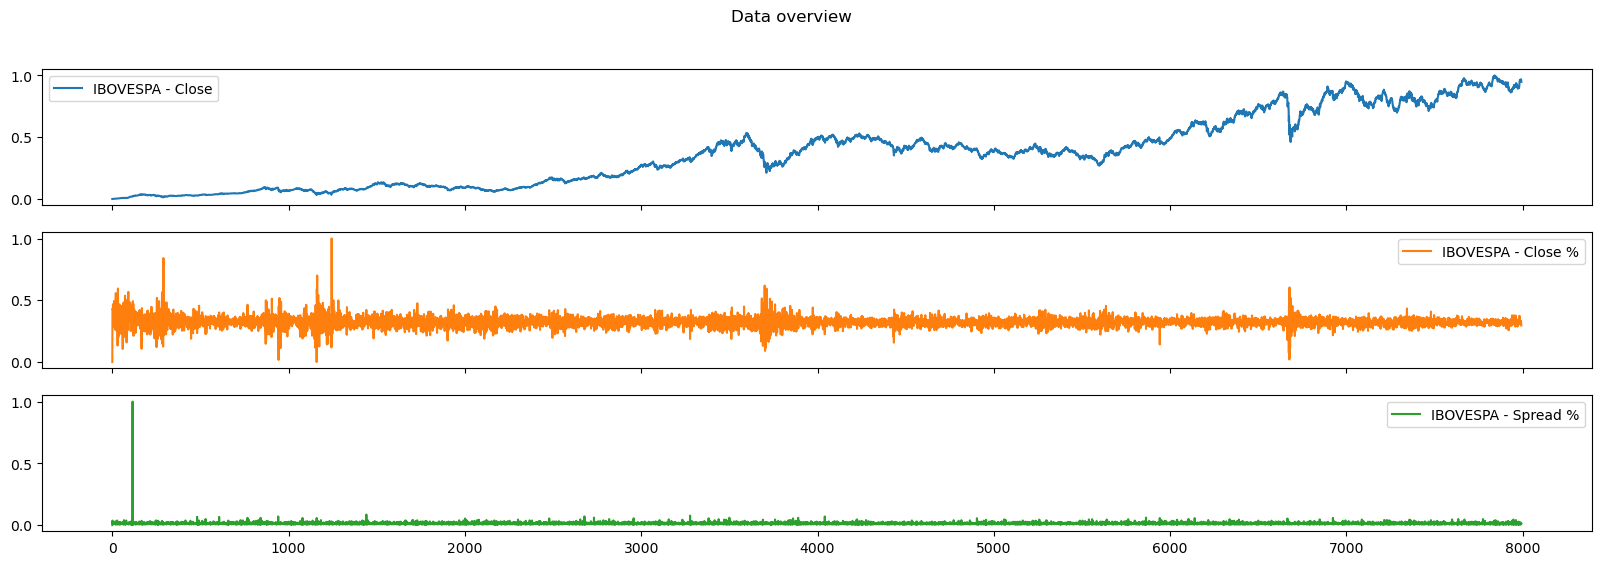

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

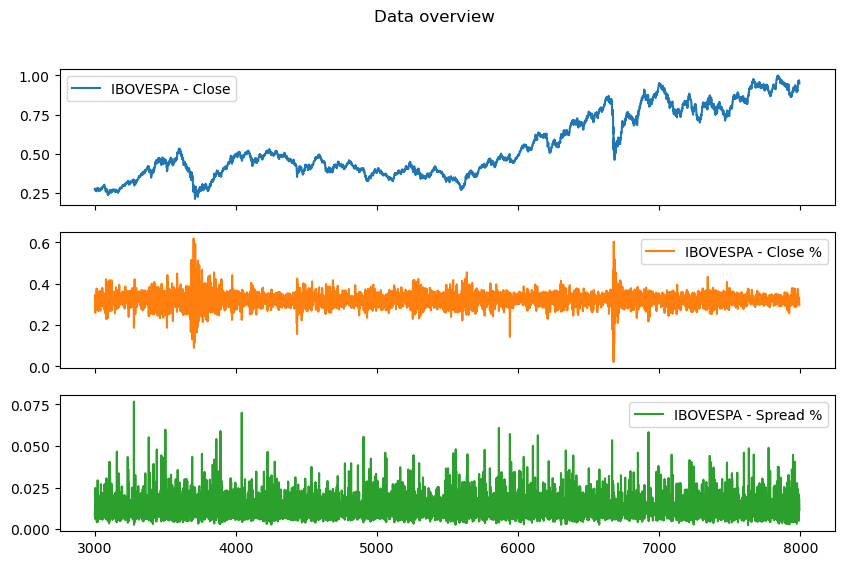

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

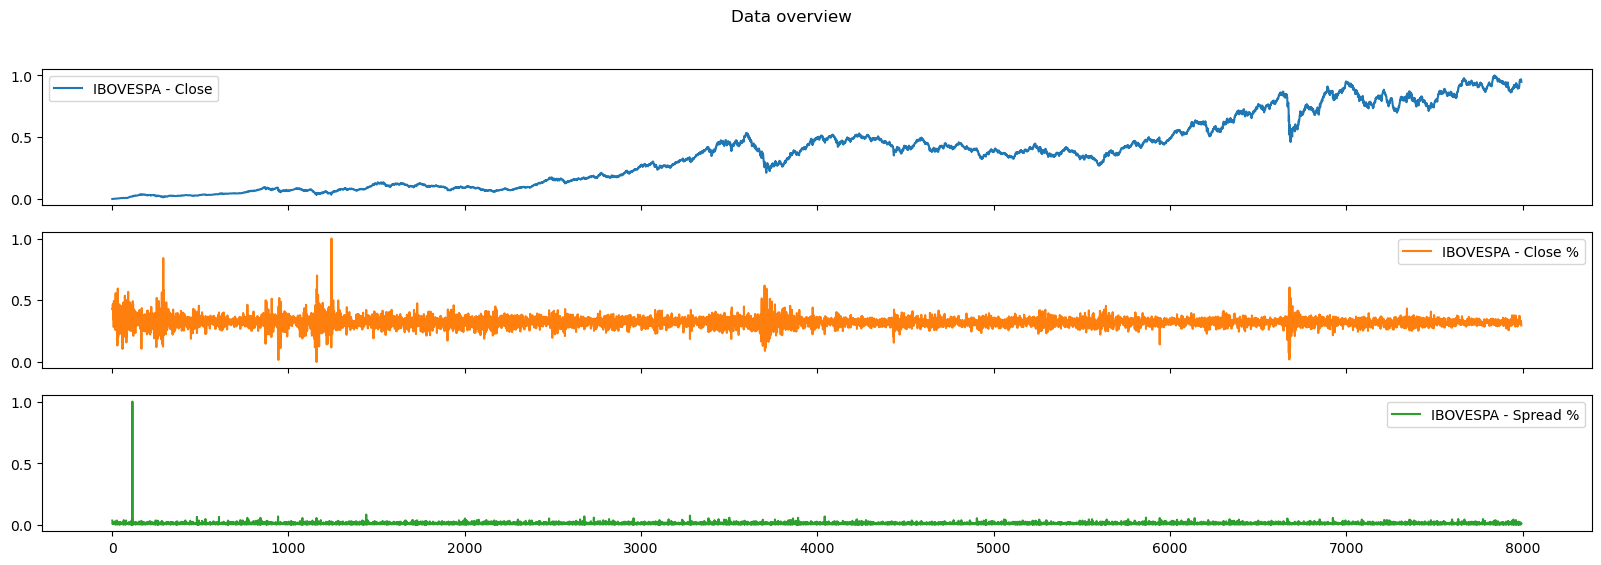

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

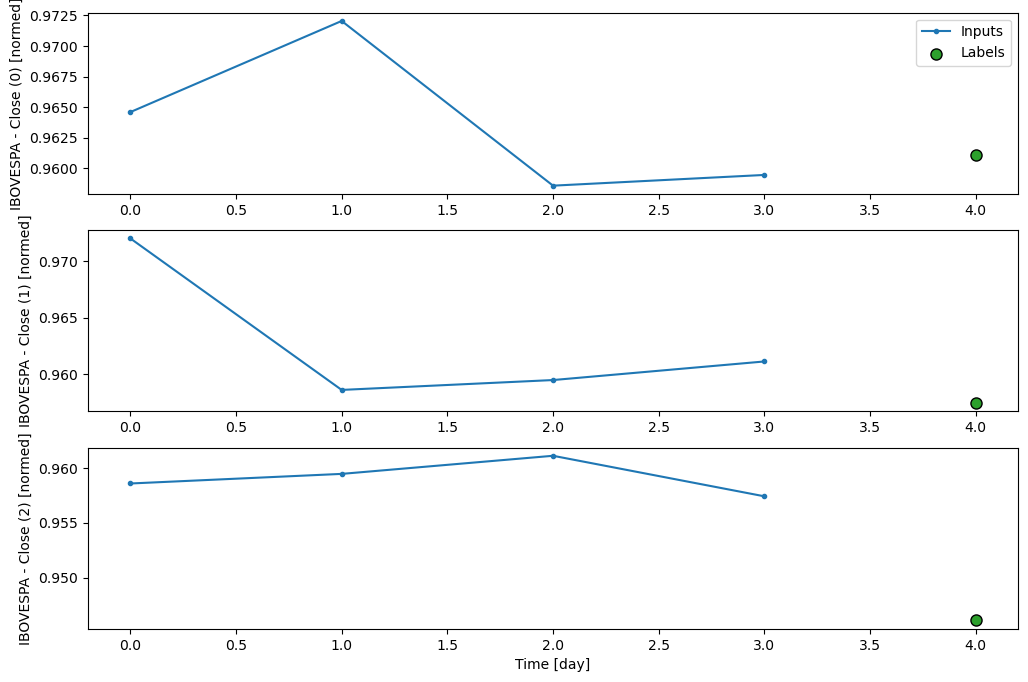

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14:44 4s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.2135 - mean_squared_error: 6.9966e-05 - root_mean_squared_error: 0.0079   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 56.1074 - mean_squared_error: 8.4068e-05 - root_mean_squared_error: 0.0089

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 47.7207 - mean_squared_error: 9.0821e-05 - root_mean_squared_error: 0.0093

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.3183 - mean_squared_error: 1.1162e-04 - root_mean_squared_error: 0.0102

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.9663 - mean_squared_error: 1.3103e-04 - root_mean_squared_error: 0.0111

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.6033 - mean_squared_error: 1.4607e-04 - root_mean_squared_error: 0.0117

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 35.3817 - mean_squared_error: 1.5604e-04 - root_mean_squared_error: 0.0121

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 33.8843 - mean_squared_error: 1.6586e-04 - root_mean_squared_error: 0.0125

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 32.7966 - mean_squared_error: 1.9724e-04 - root_mean_squared_error: 0.0135

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 31.7415 - mean_squared_error: 2.3286e-04 - root_mean_squared_error: 0.0145

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 30.9095 - mean_squared_error: 2.7523e-04 - root_mean_squared_error: 0.0156

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 30.0225 - mean_squared_error: 3.1730e-04 - root_mean_squared_error: 0.0166

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 29.3460 - mean_squared_error: 3.8487e-04 - root_mean_squared_error: 0.0180

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 28.8206 - mean_squared_error: 5.5311e-04 - root_mean_squared_error: 0.0204

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 28.3580 - mean_squared_error: 7.4414e-04 - root_mean_squared_error: 0.0229

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 27.9072 - mean_squared_error: 9.1076e-04 - root_mean_squared_error: 0.0250

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 27.4654 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0269    

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 27.0417 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 26.6408 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0301

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 26.2677 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 25.9291 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 25.6009 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 25.2854 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 25.0302 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 24.7586 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0383

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 24.4963 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0397 - val_loss: 0.1870 - val_mean_absolute_error: 0.1870 - val_mean_absolute_percentage_error: 20.0872 - val_mean_squared_error: 0.0365 - val_root_mean_squared_error: 0.1910 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7157 - mean_absolute_error: 0.7157 - mean_absolute_percentage_error: 30856.5488 - mean_squared_error: 0.5123 - root_mean_squared_error: 0.7157

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6787 - mean_absolute_error: 0.6787 - mean_absolute_percentage_error: 12901.8594 - mean_squared_error: 0.4626 - root_mean_squared_error: 0.6796 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6090 - mean_absolute_error: 0.6090 - mean_absolute_percentage_error: 9062.2939 - mean_squared_error: 0.3937 - root_mean_squared_error: 0.6238 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5311 - mean_absolute_error: 0.5311 - mean_absolute_percentage_error: 7130.0605 - mean_squared_error: 0.3321 - root_mean_squared_error: 0.5676

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 5938.9863 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5230

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4188 - mean_absolute_error: 0.4188 - mean_absolute_percentage_error: 5045.7544 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4838

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 4463.8608 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4553

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3521 - mean_absolute_error: 0.3521 - mean_absolute_percentage_error: 4014.4119 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4314

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3271 - mean_absolute_error: 0.3271 - mean_absolute_percentage_error: 3655.5193 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4111

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 3361.4795 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3935

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 3115.6138 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3781

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 2906.6045 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3644

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 2726.5017 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3522

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 2586.0034 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3425

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 2460.7798 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3336

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 2335.0332 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3246

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 2222.7366 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3163

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 2121.7791 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3086

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 2030.4518 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3015

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 1947.4028 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2949

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 1871.5250 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2888

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 1794.5277 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2824

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 1730.9911 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2772

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 1672.2440 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2723

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 1617.7461 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2678

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 1567.0258 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2635

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 1519.6863 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2595

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 1499.6532 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2578 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460 - val_mean_absolute_percentage_error: 15.6447 - val_mean_squared_error: 0.0228 - val_root_mean_squared_error: 0.1510 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6401 - mean_absolute_error: 0.6401 - mean_absolute_percentage_error: 27587.5293 - mean_squared_error: 0.4097 - root_mean_squared_error: 0.6401

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6109 - mean_absolute_error: 0.6109 - mean_absolute_percentage_error: 11561.8438 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.6117 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_absolute_percentage_error: 8148.6274 - mean_squared_error: 0.3230 - root_mean_squared_error: 0.5656 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4918 - mean_absolute_error: 0.4918 - mean_absolute_percentage_error: 6309.5161 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5162

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 5297.0996 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4789

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 4525.9551 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4452

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 4018.1514 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4202

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 3623.0093 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3991

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 3274.4143 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3792

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 3018.8347 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3636

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 2804.0710 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3499

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 2620.7397 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3377

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 2462.1672 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3268

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 2309.1506 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3159

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 2188.3589 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3069

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 2080.7637 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.2988

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1984.2456 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2912

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 1897.1259 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2843

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 1818.0542 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2778

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 1745.9277 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2718

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 1672.8452 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2655

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 1612.6045 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2603

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 1551.0383 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2549

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 1499.9022 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2504

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 1447.2836 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2457

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 1403.2822 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2418

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 1375.5576 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2393 - val_loss: 0.1126 - val_mean_absolute_error: 0.1126 - val_mean_absolute_percentage_error: 12.0252 - val_mean_squared_error: 0.0141 - val_root_mean_squared_error: 0.1186 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 14296.3809 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3313

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 5867.5845 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2942  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 3886.5972 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2503

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 3050.5422 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2235

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 2536.2444 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.2038

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 2184.9778 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1888

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 1902.8767 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1757

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 1710.1678 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1660

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 1541.3463 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1570

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1418.1473 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1501

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1315.0092 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1441

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 1236.3892 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1395

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1167.5627 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1353

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1099.6233 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1311

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 1039.9136 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1274

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 981.4503 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1237 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 934.7049 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1206

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 888.2023 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1175

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 850.4980 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1149

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 816.1602 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1124

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 784.7459 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1102

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 755.8853 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1080

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 729.2692 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1061

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 702.0162 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1041

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 679.3492 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1025

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 658.2390 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1011

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 638.5278 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.0997 - val_loss: 0.0779 - val_mean_absolute_error: 0.0779 - val_mean_absolute_percentage_error: 8.2960 - val_mean_squared_error: 0.0070 - val_root_mean_squared_error: 0.0839 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 14896.1865 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3452

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 6161.2202 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.3144  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2607 - mean_absolute_error: 0.2607 - mean_absolute_percentage_error: 4121.1069 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2728

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 3253.7124 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2459

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 2667.7595 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2237

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 2310.7380 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2082

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 2046.1367 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1956

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 1841.2223 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1852

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1677.5543 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1763

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 1543.4237 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1687

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1431.2010 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1621

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 1335.7135 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1562

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 1244.9070 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1504

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 1174.1423 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1458

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 1111.7944 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1418

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 1056.3945 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1382

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1006.7852 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1348

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 962.0614 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1318 

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 921.5135 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1289

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 880.6602 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1260

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 847.1646 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1235

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 816.3635 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1212

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 787.9323 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1190

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 761.6001 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1169

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 742.4267 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1155

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 719.2883 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1137

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 697.6861 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1121

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 693.0835 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1117 - val_loss: 0.0187 - val_mean_absolute_error: 0.0187 - val_mean_absolute_percentage_error: 2.0607 - val_mean_squared_error: 6.1640e-04 - val_root_mean_squared_error: 0.0248 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 11936.2451 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2764

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 4923.9482 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2496  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 3505.2588 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2213

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 3011.6899 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.2077

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 2653.6311 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1963

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 2481.6804 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1903

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 2245.0723 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1814

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 2054.4058 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1737

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 1868.5823 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1657

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 1740.3099 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1599

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1630.4319 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1546

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1500.4049 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1482

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 1391.7563 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1425 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1299.3833 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1375

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1219.7855 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1330

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 1159.7533 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1295

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 1105.9675 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1263

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 1049.8354 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1229

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 999.6917 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1198 

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 954.6000 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1169

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 919.3921 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1146

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 876.6970 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1118

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 838.1840 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1092

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 807.4365 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1071

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 783.0016 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1054

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 760.1493 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1038

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 731.8780 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1018

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 705.8362 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0999

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 681.7616 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0981

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 659.4323 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0964

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 636.1635 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0947

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 614.6349 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0930

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 596.8057 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0916

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 580.0859 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0904

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 564.3702 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0892

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 553.1906 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0884 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209 - val_mean_absolute_percentage_error: 2.3284 - val_mean_squared_error: 7.0399e-04 - val_root_mean_squared_error: 0.0265 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 11922.0820 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2761

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 5220.0552 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2561  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 3664.7769 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2312

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 2889.4976 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2098

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 2411.9434 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1933

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 2084.5784 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1804

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1492 - mean_absolute_error: 0.1492 - mean_absolute_percentage_error: 1844.5248 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1701

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 1659.5260 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1615

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 1512.0188 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1542

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 1377.7030 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1471

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 1278.8947 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1416

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 1194.7461 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1367

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 1122.0769 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1323

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 1058.6166 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1284

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 1002.6570 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1248

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 952.9041 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1215 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 908.3437 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1186

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 868.1824 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1158

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 831.7697 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1133

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 798.5848 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1109

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 768.2023 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1087

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 740.2713 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1066

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 714.4973 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1046

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 690.6352 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1028

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 668.4695 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1010

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 647.8192 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0994

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 626.2060 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0976

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 608.2896 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0962

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 589.4434 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0947

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 573.7426 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0934

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 568.0943 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0930 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320 - val_mean_absolute_percentage_error: 3.4059 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0363 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 12010.6660 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2782

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 5262.2661 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2589  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 3714.6548 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2368

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 2938.0706 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2163

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 2459.6470 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.2008

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 2095.6992 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1868

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 1913.8788 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1790

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 1720.3149 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1700

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 1549.2393 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1615

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 1412.3934 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1542

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 1311.5647 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1485

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 1215.7695 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1429

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1134.3804 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1378

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 1064.2745 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1334

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1003.1760 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1293

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 949.4255 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1257 

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 901.7168 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1224

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 859.0364 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1194

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 820.6047 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1166

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 785.7947 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1141

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 750.7576 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1114

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 722.0566 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1092

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 695.6941 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1071

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 671.3737 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1052

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 648.8617 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1034

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 627.9672 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1017

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 608.5120 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1002

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 590.3436 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0988

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 584.5551 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0984 - val_loss: 0.0263 - val_mean_absolute_error: 0.0263 - val_mean_absolute_percentage_error: 2.8062 - val_mean_squared_error: 9.5274e-04 - val_root_mean_squared_error: 0.0309 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 13389.6748 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.3101

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 5574.2949 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2902  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 3914.2439 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2654

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 3086.5068 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2420

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 2575.7837 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2236

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 2225.3093 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2088

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1967.4988 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1967

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1768.9414 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1865

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 1610.6298 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1779

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 1481.0476 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1704

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 1372.8088 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1638

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 1280.8376 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1580

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1201.6034 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1528

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 1139.7892 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1486

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 1078.1852 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1443

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1023.5552 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1404

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 974.7280 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1369 

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 935.4561 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1340

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 899.5320 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1312

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 862.5950 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1283

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 828.8624 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1257

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 797.9253 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1231

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 769.4345 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1208

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 740.2959 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1183

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 716.0739 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1162

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 693.5393 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1143

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 672.5165 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1125

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 659.2695 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1113 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273 - val_mean_absolute_percentage_error: 2.9022 - val_mean_squared_error: 9.6198e-04 - val_root_mean_squared_error: 0.0310 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 11679.0840 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2705

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 4851.4624 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2508  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 3402.7817 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2288

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 2623.0557 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.2066

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 2199.6035 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1914

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 1906.7845 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1791

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1492 - mean_absolute_error: 0.1492 - mean_absolute_percentage_error: 1689.9163 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1690

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1522.1255 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1605

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1387.8492 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1532

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1277.6178 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1469

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 1185.3287 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1413

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1106.7734 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1364

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1038.9952 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1320

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 973.7290 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1276 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 922.3052 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1240

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 876.5633 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1207

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 835.5823 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1177

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 798.6304 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1149

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 765.1230 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1123

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 734.5901 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1099

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 706.6468 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1077

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 680.9720 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1057

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 657.2790 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1037

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 635.3401 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1019

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 614.9619 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1003

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 595.9809 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0987

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 576.3568 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0971

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 574.4758 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0970 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 1.8248 - val_mean_squared_error: 4.8439e-04 - val_root_mean_squared_error: 0.0220 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 13942.6133 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.3228

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 6526.4087 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.3101  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 4378.9629 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2887

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 3329.1831 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2628

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - mean_absolute_percentage_error: 2823.2195 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2456

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 2427.7822 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2296

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 2139.7373 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2164

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 1919.2919 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2053

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 1744.4767 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1958

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 1602.1028 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1876

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 1483.5452 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1804

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1383.0457 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1740

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 1296.6364 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1683

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1221.4476 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1631

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 1155.3893 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1585

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1096.8387 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1543

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1044.5321 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1505

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1007.5228 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1478

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 978.0410 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1455 

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 941.5848 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1427

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 904.0089 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1397

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 869.6135 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1369

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 838.0002 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1343

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 808.8270 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1319

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 781.8111 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1296

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 756.7182 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1274

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 733.3458 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1253

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 711.5151 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1234

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 704.5588 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1228 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310 - val_mean_absolute_percentage_error: 3.2967 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0345 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 10663.8672 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2469

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 4422.8218 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2278  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 3100.8403 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.2077

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 2442.7832 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1891

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 2037.9349 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1747

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 1761.1638 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1633

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 1557.7885 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1541

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1401.2163 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1464

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 1276.5715 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1398

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 1174.8799 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1343

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 1089.9017 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1294

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1017.6198 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1251

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 955.2631 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1212 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 906.5552 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1181

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 857.9847 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1149

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 814.8865 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1119

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 776.3382 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1093

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 741.6309 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1068

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 710.1970 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1045

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 681.5823 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1023

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 652.6456 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1001

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 628.8461 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0982

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 606.8912 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0965

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 586.5695 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0949

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 567.7029 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0934

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 550.1386 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0920

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 533.7365 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0907

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 526.7925 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0902 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210 - val_mean_absolute_percentage_error: 2.2387 - val_mean_squared_error: 6.2632e-04 - val_root_mean_squared_error: 0.0250 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 11588.2217 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2681

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 4814.7207 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2497  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 3280.4958 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2261

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 2608.0808 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.2066

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 2187.2305 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1913

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 1895.9526 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1789

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 1659.8018 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1678

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1497.4381 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1596

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1367.3043 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1525

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1260.5927 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1465

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 1171.0337 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1412

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 1094.6143 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1365

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1028.5200 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1322

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 964.7490 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1280 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 914.4124 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1245

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 869.5759 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1213

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 829.3547 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1183

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 793.0478 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1156

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 760.0919 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1130

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 730.0299 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1107

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 702.4857 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1084

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 674.4537 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1061

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 651.2545 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1042

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 629.7514 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1023

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 609.7627 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1006

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 595.1612 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0994

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 577.4860 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0979

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 573.7188 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0975 - val_loss: 0.0389 - val_mean_absolute_error: 0.0389 - val_mean_absolute_percentage_error: 4.1443 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0417 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 8199.4365 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1896

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 3379.5356 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1713 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 2349.2302 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1530

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1843.2505 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1383

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1507.7462 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1265

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1305.3541 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1183

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1155.9359 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1116

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 1040.6514 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1061

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 948.5322 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1013 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 873.0894 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0972

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 809.9639 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0935

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 756.2617 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0904

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 709.9251 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0875

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 669.4922 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0849

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 633.8939 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0826

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 602.2765 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0806

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 573.9773 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0787

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 548.4830 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0770

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 525.3831 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0753

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 502.1237 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0737

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 483.0644 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0723

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 465.5445 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0711

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 449.3741 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 434.3994 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0687

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 420.4922 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0677

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 407.5401 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 394.1499 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0658

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 392.8665 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0657 - val_loss: 0.0162 - val_mean_absolute_error: 0.0162 - val_mean_absolute_percentage_error: 1.7961 - val_mean_squared_error: 4.2724e-04 - val_root_mean_squared_error: 0.0207 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 10123.6523 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2341

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 4203.4150 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2175  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 2861.2607 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1965

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 2273.9565 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1795

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 1907.6121 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1664

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1654.0291 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1559

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 1466.2397 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1472

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1320.8186 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1399

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1204.4305 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1336

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 1128.6976 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1293

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1045.6864 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1243

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 975.2250 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1200 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 914.5765 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1160

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 861.7668 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1125

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 815.3428 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1093

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 774.1808 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1065

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 737.3970 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1039

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 704.2989 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1016

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 677.5223 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0996

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 649.9692 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0975

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 624.7852 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0956

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 601.6671 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0938

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 580.3621 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0921

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 560.6580 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0905

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 542.3768 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0889

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 525.3680 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0875

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 509.4995 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0862

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 499.4992 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0853 - val_loss: 0.0345 - val_mean_absolute_error: 0.0345 - val_mean_absolute_percentage_error: 3.6799 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0375 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 8278.3896 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1914

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 3415.6040 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1736 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 2380.1619 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1560

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 1869.9331 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1414

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 1558.7698 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1307

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1346.4883 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1223

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 1190.6935 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1155

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1070.8649 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1098

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 975.5392 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1050 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 897.8716 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1009

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 833.0115 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0975

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 777.8447 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0943

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 730.2474 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0915

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 684.4209 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0887

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 648.3375 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0864

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 616.2557 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0843

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 587.5135 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0824

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 561.5983 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0806

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 538.0967 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0789

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 516.6776 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0773

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 497.0684 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0759

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 480.9741 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0746

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 467.8094 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0736

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 452.0096 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0724

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 437.3490 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0712

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 423.7075 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 410.9775 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0691

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 402.9538 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685 - val_loss: 0.0343 - val_mean_absolute_error: 0.0343 - val_mean_absolute_percentage_error: 3.6646 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0368 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 8236.3750 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1903

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 3396.6108 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1728 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 2293.1477 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1531

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1816.2191 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1391

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1520.7725 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1287

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1317.3571 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1204

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 1167.1332 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1137

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1039.7985 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1076

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 949.3204 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1029 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 867.8137 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0986

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 806.8062 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0952

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 760.0908 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0925

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 738.9205 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0913

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 719.0257 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0901

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 678.3547 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0875

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 642.5161 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0853

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 610.6586 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0832

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 582.1223 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0813

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 556.3968 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0795

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 530.6119 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0777

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 507.3433 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0759

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 488.2539 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0745

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 470.6917 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0732

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 454.4724 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0719

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 439.4422 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0707

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 425.4747 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0696

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 411.0666 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 398.9956 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348 - val_mean_absolute_percentage_error: 3.7096 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0372 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 8273.1377 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1911

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1732 - mean_absolute_error: 0.1732 - mean_absolute_percentage_error: 3413.8425 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1739 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 2309.8655 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1550

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1831.2012 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1410

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 1561.9447 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1317

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1349.3849 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1233

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 1193.2263 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1164

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1073.0380 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1106

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 967.9120 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1051 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 891.5751 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1011

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 827.6746 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0976

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 773.2480 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0944

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 731.1436 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0919

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 698.2756 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0898

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 664.5497 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0877

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 634.2740 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0857

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 603.6789 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0837

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 576.1931 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0818

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 551.3466 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0801

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 528.7655 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0784

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 508.1471 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0769

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 489.2448 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0755

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 471.8397 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0742

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 455.7519 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0729

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 440.8335 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0717

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 426.9599 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0707

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 415.4189 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 403.2401 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0689 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.6238 - val_mean_squared_error: 3.4742e-04 - val_root_mean_squared_error: 0.0186 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 8898.4590 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.2055

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 3688.4612 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1901 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 2585.8965 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1733

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 2037.5601 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1579

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 1701.2327 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1463

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1449.2235 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1360

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1284.6128 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1285

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1157.1168 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1221

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 1055.0894 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1166

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 962.9972 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1113 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 894.2047 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1072

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 835.5411 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1035

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 784.8471 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1002

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 745.2062 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0975

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 709.8002 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0951

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 677.9580 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0929

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 652.5922 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0912

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 619.8040 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0889

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 593.2632 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0869

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 571.6968 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0853

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 551.7966 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0838

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 531.1614 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0822

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 512.1606 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0806

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 494.6018 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0792

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 480.0720 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 466.4542 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0769

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 458.3678 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0762

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 447.5534 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0752

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 437.2915 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0744 - val_loss: 0.0372 - val_mean_absolute_error: 0.0372 - val_mean_absolute_percentage_error: 3.9627 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0403 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 6439.6455 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1486

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 3186.5256 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1380  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 2106.5513 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1235

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1580.2856 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1100

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 1285.7422 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1006

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1111.5000 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0941

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 997.7004 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0894 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 907.3837 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0854

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 833.7247 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0819

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 764.4612 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0784

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 707.0056 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0754

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 664.1439 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0730

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 626.7224 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0709

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 598.1937 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0692

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 568.3592 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 541.6573 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 517.6055 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 495.8142 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0628

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 473.2766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 455.3402 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 438.8496 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 421.5501 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 407.6040 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 400.0836 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 392.8642 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 387.6360 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 384.2353 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 380.9001 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0548

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 376.0159 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 372.8361 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 368.1764 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 363.6437 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 356.3571 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 349.3860 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 342.7097 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0518

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 335.0605 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 330.1674 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0508

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 326.5999 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 324.2686 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 321.9737 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 317.4904 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 313.1432 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 309.9680 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 305.8439 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 303.8276 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 302.8319 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486 - val_loss: 0.0350 - val_mean_absolute_error: 0.0350 - val_mean_absolute_percentage_error: 3.7226 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0380 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 6453.3740 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1489

  3/238 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 4675.7490 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1462

  8/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 2979.5049 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1365 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 2514.9424 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1311

 15/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 2112.3604 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1242

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 1723.7894 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1147

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 1470.4408 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1072

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1289.9180 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1012

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1134.0375 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0955

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 1001.1774 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0901

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 910.6450 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0861 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 836.8885 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0826

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 775.4554 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0796

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 723.3722 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0768

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 696.9982 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0754

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 666.9335 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0738

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 629.4126 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0716

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 591.9047 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0694

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 559.0563 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674 

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 530.0213 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0656

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 507.2310 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 486.5151 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0628

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 465.0220 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 447.8690 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 429.9033 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 415.4418 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 402.0171 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 391.2507 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 379.4691 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 368.4467 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 356.6846 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 348.3929 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0527

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 340.5157 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 333.0225 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 325.8854 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 319.0796 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 312.5815 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 306.3695 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 304.3613 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325 - val_mean_absolute_percentage_error: 3.4660 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0351 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 6328.7446 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1460

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 2743.6323 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1315 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 1991.8307 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1196

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1739.8590 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1133

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1594.5607 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1092

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1439.9738 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1046

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1289.3783 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0998

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 1192.3381 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0964

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1075.2144 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0921

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 995.9380 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0889 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 893.4745 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0846

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 803.3774 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0805

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 731.7133 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0770 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 673.3690 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0742

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 624.6463 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0716

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 587.5150 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0696

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 554.9959 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0678

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 526.2476 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0661

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 503.6846 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0647

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 483.1850 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0635

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 461.9195 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0621

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 442.6345 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 427.1684 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 410.8977 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 395.9449 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 383.8174 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 372.4871 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 363.3496 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 353.2977 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 342.5378 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 333.7002 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 324.1994 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 314.2040 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 304.8690 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 301.8946 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323 - val_mean_absolute_percentage_error: 3.4511 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0347 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 6563.0645 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1514

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 2692.6677 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1353  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1867.2703 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1202

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1463.4459 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1085

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 1218.3203 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1002

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 1051.6661 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0937

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 929.5399 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0884 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 835.6839 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0841

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 784.1594 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0816

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 725.8248 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0786

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 670.9865 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0758

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 624.6978 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0733

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 585.0181 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0710

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 557.8276 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0694

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 526.7463 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0675

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 499.3085 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0658

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 472.3242 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 450.6628 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0627

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 431.0967 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0613

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 413.3255 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 395.3918 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 380.6672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 367.1096 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 354.5786 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 342.9585 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 333.3159 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 323.1631 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 313.6747 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0527 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333 - val_mean_absolute_percentage_error: 3.5574 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0357 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 6797.3286 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1567

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 2791.9912 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1408 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 1940.1713 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1257

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 1522.1880 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1137

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1268.4403 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1052

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 1079.3231 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0978

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 956.1368 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0924 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 860.8735 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0879

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 784.7186 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0840

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 722.3085 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0806

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 670.0835 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0776

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 625.6299 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0749

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 587.2822 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0725

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 553.8295 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0704

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 524.3782 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 495.4907 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0666

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 472.3521 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0650

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 449.2976 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 430.5796 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0621

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 413.5153 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0609

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 401.2485 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 385.0682 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 371.6908 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 359.3023 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0569

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 347.7949 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 335.9306 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 324.9318 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260 - val_mean_absolute_percentage_error: 2.7632 - val_mean_squared_error: 8.5973e-04 - val_root_mean_squared_error: 0.0293 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 6999.6841 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1613

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 2875.6826 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1453 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1997.9923 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1297

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1567.2527 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1173

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 1305.7201 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1085

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1127.3187 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1015

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 996.3600 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0957 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 895.5361 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0909

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 815.2151 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0868

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 742.9722 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0828

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 689.1788 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0797

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 638.7306 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0767

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 599.8564 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0742

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 565.9008 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 535.9712 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0701

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 506.5833 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 483.0251 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0664

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 461.7715 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 442.4886 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 424.9084 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0622

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 410.5306 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 395.5897 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 381.8030 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 367.6765 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 355.9161 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 344.9613 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 333.6351 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2475 - val_mean_squared_error: 2.1739e-04 - val_root_mean_squared_error: 0.0147 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 5662.7930 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1304

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 2315.2952 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1154 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 1599.3763 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1016

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1281.6609 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0925

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1101.9792 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0866

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 1022.8462 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0837

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 926.0348 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0800 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 814.1072 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0752

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 728.8173 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0713

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 661.4257 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0679

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 606.7552 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 561.3710 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0626

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 522.9774 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0604

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 490.0033 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 461.3382 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 436.1663 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 413.8609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 391.8603 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 374.1588 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 358.1396 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 343.5665 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 330.2461 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 318.0181 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 305.5509 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 295.2169 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 285.6285 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 276.7065 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 268.3811 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 264.8578 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_absolute_percentage_error: 2.7842 - val_mean_squared_error: 8.2068e-04 - val_root_mean_squared_error: 0.0286 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 3664.5115 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 1658.6151 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 1065.5055 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 834.8634 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 695.3430 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0501

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 591.1038 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 531.9666 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 491.0918 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 456.8542 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 432.2337 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 402.4067 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 370.2857 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 343.4729 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 320.6766 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 301.0266 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 287.5097 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 280.3853 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 270.4160 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 258.3021 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 246.0444 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 235.0196 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 225.0423 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 215.9665 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 208.5599 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 203.3710 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 197.6719 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 193.8135 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 188.6850 - mean_squared_error: 9.9412e-04 - root_mean_squared_error: 0.0294

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 184.5231 - mean_squared_error: 9.7885e-04 - root_mean_squared_error: 0.0292

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 180.5617 - mean_squared_error: 9.6469e-04 - root_mean_squared_error: 0.0290

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 176.1738 - mean_squared_error: 9.4959e-04 - root_mean_squared_error: 0.0288

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 172.0194 - mean_squared_error: 9.3665e-04 - root_mean_squared_error: 0.0286

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 167.5318 - mean_squared_error: 9.2326e-04 - root_mean_squared_error: 0.0284

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 166.4517 - mean_squared_error: 9.2002e-04 - root_mean_squared_error: 0.0284 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2654 - val_mean_squared_error: 2.2360e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 6183.6553 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1425

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 2853.9746 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1309 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1953.3579 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1184

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1567.1703 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1086

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1323.3296 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1012

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1132.5419 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0947

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 1010.6318 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0899

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 915.1017 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0859 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 818.4793 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0814

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 742.2916 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0776

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 680.4482 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0743

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 634.3873 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0717

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 608.9686 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0703

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 585.7225 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0689

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 568.5017 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0678

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 552.3724 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0668

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 522.9853 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0649

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 490.7944 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0628

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 465.3573 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 447.5047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0599

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 437.9692 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 433.3688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0589

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 428.8745 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 415.9909 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 398.1946 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 382.0043 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 370.3832 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 358.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 345.1638 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 333.2847 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 322.2745 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 312.0395 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 302.5003 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 294.5481 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233 - val_mean_absolute_percentage_error: 2.4711 - val_mean_squared_error: 6.9774e-04 - val_root_mean_squared_error: 0.0264 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 3659.7920 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0839

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 1780.6614 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0741  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 1201.3071 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 880.6131 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 708.8918 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 599.7130 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0469

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 516.2334 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 460.8526 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 417.4902 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 382.4193 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 353.3927 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 328.9058 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 307.9232 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 289.7188 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 273.7698 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 259.6695 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 247.0979 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 235.8086 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 225.6081 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 216.3408 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 207.8813 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 200.1247 - mean_squared_error: 9.8291e-04 - root_mean_squared_error: 0.0289

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 192.9839 - mean_squared_error: 9.5351e-04 - root_mean_squared_error: 0.0284

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 186.3867 - mean_squared_error: 9.2635e-04 - root_mean_squared_error: 0.0279

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 180.9285 - mean_squared_error: 9.0407e-04 - root_mean_squared_error: 0.0276

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 175.8148 - mean_squared_error: 8.8386e-04 - root_mean_squared_error: 0.0273

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 171.0150 - mean_squared_error: 8.6664e-04 - root_mean_squared_error: 0.0270

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 165.9537 - mean_squared_error: 8.4979e-04 - root_mean_squared_error: 0.0268

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 164.8751 - mean_squared_error: 8.4624e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3644 - val_mean_squared_error: 2.4652e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 4767.3242 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1097

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1940.6865 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0954 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 1335.7183 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0833

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 1044.2737 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0749

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 852.3870 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0684 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 737.0223 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0639

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 644.0354 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0599

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 580.2195 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 524.1558 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 483.1857 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 445.3100 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 416.4547 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 388.8968 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 367.3419 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 346.3015 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 329.5231 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 314.4526 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 300.8322 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 287.1503 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 275.9612 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 265.6948 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 256.2374 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 247.4944 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 239.3868 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 231.8475 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 225.5749 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 220.3879 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349 - val_loss: 0.0220 - val_mean_absolute_error: 0.0220 - val_mean_absolute_percentage_error: 2.3369 - val_mean_squared_error: 6.0315e-04 - val_root_mean_squared_error: 0.0246 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 3427.4116 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0785

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 1547.4264 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 1119.1487 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 896.4951 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0535 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 739.2894 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0492

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 634.2560 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 559.0535 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 501.9576 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 456.8060 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 424.8909 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 397.6735 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 381.6158 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 360.1028 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 338.2188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 316.6002 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 295.6870 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 277.6389 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 261.8931 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 248.0384 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 235.7362 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 224.7241 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 214.8025 - mean_squared_error: 9.7744e-04 - root_mean_squared_error: 0.0291

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 205.8109 - mean_squared_error: 9.4745e-04 - root_mean_squared_error: 0.0287

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 197.6202 - mean_squared_error: 9.1973e-04 - root_mean_squared_error: 0.0282

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 189.3328 - mean_squared_error: 8.9158e-04 - root_mean_squared_error: 0.0278

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 183.2430 - mean_squared_error: 8.7118e-04 - root_mean_squared_error: 0.0275

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 176.2157 - mean_squared_error: 8.4725e-04 - root_mean_squared_error: 0.0271

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 170.3830 - mean_squared_error: 8.2724e-04 - root_mean_squared_error: 0.0268

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 164.9653 - mean_squared_error: 8.0924e-04 - root_mean_squared_error: 0.0265

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 159.9196 - mean_squared_error: 7.9372e-04 - root_mean_squared_error: 0.0262

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 154.7028 - mean_squared_error: 7.7858e-04 - root_mean_squared_error: 0.0260

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 154.2027 - mean_squared_error: 7.7713e-04 - root_mean_squared_error: 0.0260 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6138 - val_mean_squared_error: 3.3637e-04 - val_root_mean_squared_error: 0.0183 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 5120.3779 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1178

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 2086.4839 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1032 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 1394.2274 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0894

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 1100.5228 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0808

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 919.6262 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0746 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 795.6071 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0698

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 704.1233 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0659

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 633.5120 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0626

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 577.1678 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0597

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 530.9939 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 492.3753 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 459.5246 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 431.1979 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 406.4986 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 382.5074 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 365.4659 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 348.1988 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 335.9690 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 321.5746 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 311.2885 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 301.7059 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 291.5251 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 282.0766 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 272.2241 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 263.1024 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 255.5437 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 251.0590 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 244.2365 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 237.8140 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5444 - val_mean_squared_error: 3.1667e-04 - val_root_mean_squared_error: 0.0178 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 4398.0581 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1010

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 1781.3397 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 1220.8655 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0751

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 932.8583 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0672 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 779.5552 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0623

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 674.5582 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0584

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 597.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 537.2363 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 489.5060 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 450.4698 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 414.5236 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 387.2221 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 363.6412 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 343.0492 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 323.0160 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 307.0864 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 292.8083 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 279.9285 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 268.2439 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 257.5909 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 247.8349 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 238.8633 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 230.5820 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 222.9117 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 215.7866 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 211.3117 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 208.4414 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 204.9734 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 202.2911 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1907 - val_mean_squared_error: 2.0103e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 3369.1689 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0771

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 1524.0986 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 1059.0217 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 832.9437 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 712.0378 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0482

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 638.0394 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 569.7697 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 508.7295 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 461.0535 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 412.8640 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 374.8560 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 343.9430 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 318.2362 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 296.4759 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 277.7873 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 266.7181 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 258.2188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 245.8081 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 233.3374 - mean_squared_error: 9.8308e-04 - root_mean_squared_error: 0.0289

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 221.0280 - mean_squared_error: 9.3780e-04 - root_mean_squared_error: 0.0282

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 211.1179 - mean_squared_error: 9.0106e-04 - root_mean_squared_error: 0.0275

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 202.1444 - mean_squared_error: 8.6749e-04 - root_mean_squared_error: 0.0270

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 194.8484 - mean_squared_error: 8.4001e-04 - root_mean_squared_error: 0.0265

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 186.5090 - mean_squared_error: 8.0838e-04 - root_mean_squared_error: 0.0259

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 179.6502 - mean_squared_error: 7.8221e-04 - root_mean_squared_error: 0.0255

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 173.3270 - mean_squared_error: 7.5799e-04 - root_mean_squared_error: 0.0250

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 167.4771 - mean_squared_error: 7.3559e-04 - root_mean_squared_error: 0.0246

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 162.0497 - mean_squared_error: 7.1544e-04 - root_mean_squared_error: 0.0242

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 157.0001 - mean_squared_error: 6.9773e-04 - root_mean_squared_error: 0.0239

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 151.7852 - mean_squared_error: 6.8058e-04 - root_mean_squared_error: 0.0236

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 150.2959 - mean_squared_error: 6.7573e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0164 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 1.7378 - val_mean_squared_error: 3.8202e-04 - val_root_mean_squared_error: 0.0195 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 3534.2585 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0811

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 1500.7341 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0683 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 1030.8923 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 786.0712 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 644.7094 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 569.5595 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 504.9621 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 449.6060 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 406.4623 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 371.6979 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 342.9997 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 321.3434 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 304.7448 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 286.0114 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 271.3870 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 256.8146 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 243.8896 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 232.3317 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 223.0331 - mean_squared_error: 9.9808e-04 - root_mean_squared_error: 0.0290

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 218.6865 - mean_squared_error: 9.8179e-04 - root_mean_squared_error: 0.0288

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 214.5241 - mean_squared_error: 9.6611e-04 - root_mean_squared_error: 0.0285

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 208.6001 - mean_squared_error: 9.4367e-04 - root_mean_squared_error: 0.0281

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 200.3648 - mean_squared_error: 9.1225e-04 - root_mean_squared_error: 0.0276

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 193.6275 - mean_squared_error: 8.8641e-04 - root_mean_squared_error: 0.0272

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 187.3743 - mean_squared_error: 8.6232e-04 - root_mean_squared_error: 0.0268

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 181.5530 - mean_squared_error: 8.3986e-04 - root_mean_squared_error: 0.0264

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 176.1184 - mean_squared_error: 8.1884e-04 - root_mean_squared_error: 0.0261

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 172.9015 - mean_squared_error: 8.0665e-04 - root_mean_squared_error: 0.0259

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 169.2095 - mean_squared_error: 7.9287e-04 - root_mean_squared_error: 0.0256

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 164.5523 - mean_squared_error: 7.7652e-04 - root_mean_squared_error: 0.0254

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 159.1175 - mean_squared_error: 7.5848e-04 - root_mean_squared_error: 0.0251

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 158.0791 - mean_squared_error: 7.5505e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2875 - val_mean_squared_error: 2.3244e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 4212.1260 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0968

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 1705.6255 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 1169.7543 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0719

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 914.2149 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 759.9957 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 655.3827 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0560

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 578.7261 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0528

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 519.7796 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 477.6370 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 442.5340 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 409.3570 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 384.1930 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 359.6991 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 338.4404 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 321.7603 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 305.0500 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 290.1567 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 276.7897 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 264.7177 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 253.7555 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 243.7524 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 234.5836 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 226.1451 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 218.3506 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 211.1277 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 205.1377 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 198.8346 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 192.9472 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305 - val_loss: 0.0184 - val_mean_absolute_error: 0.0184 - val_mean_absolute_percentage_error: 1.9536 - val_mean_squared_error: 4.5333e-04 - val_root_mean_squared_error: 0.0213 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 2944.0652 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0674

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 1165.6406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 814.5958 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 642.6719 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 526.2907 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 449.9979 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 395.4893 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 354.1905 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 321.6260 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 295.1654 - mean_squared_error: 9.8219e-04 - root_mean_squared_error: 0.0295

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 270.9659 - mean_squared_error: 9.1713e-04 - root_mean_squared_error: 0.0284

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 252.6805 - mean_squared_error: 8.6646e-04 - root_mean_squared_error: 0.0276

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 236.9500 - mean_squared_error: 8.2190e-04 - root_mean_squared_error: 0.0268

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 223.2598 - mean_squared_error: 7.8285e-04 - root_mean_squared_error: 0.0261

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 211.2388 - mean_squared_error: 7.4974e-04 - root_mean_squared_error: 0.0255

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 200.5893 - mean_squared_error: 7.2226e-04 - root_mean_squared_error: 0.0250

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 190.0770 - mean_squared_error: 6.9484e-04 - root_mean_squared_error: 0.0245

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 181.6130 - mean_squared_error: 6.7260e-04 - root_mean_squared_error: 0.0241

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 173.9483 - mean_squared_error: 6.5207e-04 - root_mean_squared_error: 0.0238

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 166.9725 - mean_squared_error: 6.3319e-04 - root_mean_squared_error: 0.0234

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 160.5956 - mean_squared_error: 6.1596e-04 - root_mean_squared_error: 0.0231

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 154.7446 - mean_squared_error: 6.0087e-04 - root_mean_squared_error: 0.0228

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 149.3487 - mean_squared_error: 5.8674e-04 - root_mean_squared_error: 0.0226

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 144.3544 - mean_squared_error: 5.7350e-04 - root_mean_squared_error: 0.0223

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 139.7188 - mean_squared_error: 5.6163e-04 - root_mean_squared_error: 0.0221

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 136.8086 - mean_squared_error: 5.5449e-04 - root_mean_squared_error: 0.0220

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 132.6898 - mean_squared_error: 5.4543e-04 - root_mean_squared_error: 0.0218

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 129.6733 - mean_squared_error: 5.3897e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3281 - val_mean_squared_error: 2.4340e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 4904.3740 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1128

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1999.2783 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0991 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 1339.0289 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0863

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 1057.7239 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0781

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 869.1719 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0717 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 754.6773 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0672

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 669.6750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0636

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 603.7095 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 550.8291 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0578

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 507.3474 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0555

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 482.3689 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 463.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 449.6408 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 427.4036 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 402.1635 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 387.1014 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 375.4781 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 364.6069 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 354.4143 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 341.1621 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 330.6476 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 320.8272 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 311.6318 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 303.0017 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 293.5789 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 286.0034 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 276.5510 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 267.7641 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 259.5728 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 252.8460 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 245.6153 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 238.0092 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 230.9071 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 229.3936 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173 - val_mean_absolute_percentage_error: 1.8356 - val_mean_squared_error: 4.1680e-04 - val_root_mean_squared_error: 0.0204 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 2979.9949 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0681

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 1339.7639 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 827.1354 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 636.7603 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 524.6412 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 457.1643 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 407.1180 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 372.5426 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 351.6841 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 333.3145 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 310.9457 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 291.7008 - mean_squared_error: 9.9738e-04 - root_mean_squared_error: 0.0296

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 270.5444 - mean_squared_error: 9.3688e-04 - root_mean_squared_error: 0.0287

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 254.4133 - mean_squared_error: 8.8969e-04 - root_mean_squared_error: 0.0279

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 240.2879 - mean_squared_error: 8.4767e-04 - root_mean_squared_error: 0.0271

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 226.3475 - mean_squared_error: 8.0595e-04 - root_mean_squared_error: 0.0264

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 216.6956 - mean_squared_error: 7.7729e-04 - root_mean_squared_error: 0.0259

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 206.7348 - mean_squared_error: 7.4828e-04 - root_mean_squared_error: 0.0253

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 197.7441 - mean_squared_error: 7.2208e-04 - root_mean_squared_error: 0.0249

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 189.5827 - mean_squared_error: 6.9810e-04 - root_mean_squared_error: 0.0244

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 181.2512 - mean_squared_error: 6.7335e-04 - root_mean_squared_error: 0.0240

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 174.4984 - mean_squared_error: 6.5302e-04 - root_mean_squared_error: 0.0236

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 167.5392 - mean_squared_error: 6.3186e-04 - root_mean_squared_error: 0.0232

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 161.1699 - mean_squared_error: 6.1234e-04 - root_mean_squared_error: 0.0228

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 155.3158 - mean_squared_error: 5.9428e-04 - root_mean_squared_error: 0.0224

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 149.9148 - mean_squared_error: 5.7762e-04 - root_mean_squared_error: 0.0221

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 144.9143 - mean_squared_error: 5.6226e-04 - root_mean_squared_error: 0.0218

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 140.2716 - mean_squared_error: 5.4865e-04 - root_mean_squared_error: 0.0215

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 135.9498 - mean_squared_error: 5.3717e-04 - root_mean_squared_error: 0.0213

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 131.4837 - mean_squared_error: 5.2622e-04 - root_mean_squared_error: 0.0211

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 131.0556 - mean_squared_error: 5.2518e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0843 - val_mean_squared_error: 1.6422e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 3520.1760 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0807

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 1499.6421 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 1034.0671 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 809.1011 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 672.9292 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 580.5107 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 513.1270 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 461.3559 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 420.1357 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 390.3223 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 368.3080 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 342.9449 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 321.1951 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 302.3131 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 283.8179 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 267.6764 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 253.4513 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 240.8066 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 229.4851 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 220.3661 - mean_squared_error: 9.8123e-04 - root_mean_squared_error: 0.0285

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 213.0201 - mean_squared_error: 9.5181e-04 - root_mean_squared_error: 0.0280

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 205.2612 - mean_squared_error: 9.2059e-04 - root_mean_squared_error: 0.0275

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 197.2468 - mean_squared_error: 8.8817e-04 - root_mean_squared_error: 0.0269

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 189.8949 - mean_squared_error: 8.5830e-04 - root_mean_squared_error: 0.0264

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 183.1236 - mean_squared_error: 8.3068e-04 - root_mean_squared_error: 0.0259

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 176.8648 - mean_squared_error: 8.0514e-04 - root_mean_squared_error: 0.0255

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 171.0617 - mean_squared_error: 7.8178e-04 - root_mean_squared_error: 0.0251

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 165.6657 - mean_squared_error: 7.6066e-04 - root_mean_squared_error: 0.0247

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 160.6351 - mean_squared_error: 7.4183e-04 - root_mean_squared_error: 0.0244

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 157.4661 - mean_squared_error: 7.3010e-04 - root_mean_squared_error: 0.0242 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175 - val_mean_absolute_percentage_error: 1.8548 - val_mean_squared_error: 4.1447e-04 - val_root_mean_squared_error: 0.0204 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 2604.1162 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0595

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 1023.3506 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 688.9943 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 534.6727 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 442.3969 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 380.6570 - mean_squared_error: 9.7406e-04 - root_mean_squared_error: 0.0295

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 331.8739 - mean_squared_error: 8.8496e-04 - root_mean_squared_error: 0.0281

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 298.7572 - mean_squared_error: 8.2265e-04 - root_mean_squared_error: 0.0271

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 272.3524 - mean_squared_error: 7.6963e-04 - root_mean_squared_error: 0.0262

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 250.7478 - mean_squared_error: 7.2417e-04 - root_mean_squared_error: 0.0254

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 232.6854 - mean_squared_error: 6.8489e-04 - root_mean_squared_error: 0.0247

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 217.3124 - mean_squared_error: 6.5022e-04 - root_mean_squared_error: 0.0240

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 204.0505 - mean_squared_error: 6.1959e-04 - root_mean_squared_error: 0.0234

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 192.4853 - mean_squared_error: 5.9323e-04 - root_mean_squared_error: 0.0229

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 182.3112 - mean_squared_error: 5.7149e-04 - root_mean_squared_error: 0.0224

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 173.2763 - mean_squared_error: 5.5306e-04 - root_mean_squared_error: 0.0221

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 165.1886 - mean_squared_error: 5.3631e-04 - root_mean_squared_error: 0.0218

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 157.9014 - mean_squared_error: 5.2094e-04 - root_mean_squared_error: 0.0215

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 151.2969 - mean_squared_error: 5.0662e-04 - root_mean_squared_error: 0.0212

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 145.2819 - mean_squared_error: 4.9337e-04 - root_mean_squared_error: 0.0209

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 140.9609 - mean_squared_error: 4.8376e-04 - root_mean_squared_error: 0.0207

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 135.8125 - mean_squared_error: 4.7250e-04 - root_mean_squared_error: 0.0204

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 131.0660 - mean_squared_error: 4.6194e-04 - root_mean_squared_error: 0.0202

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 126.6739 - mean_squared_error: 4.5200e-04 - root_mean_squared_error: 0.0200

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 122.5982 - mean_squared_error: 4.4318e-04 - root_mean_squared_error: 0.0198

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 118.8060 - mean_squared_error: 4.3570e-04 - root_mean_squared_error: 0.0197

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 115.2678 - mean_squared_error: 4.2948e-04 - root_mean_squared_error: 0.0195

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 113.4026 - mean_squared_error: 4.2622e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3902 - val_mean_squared_error: 2.5994e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 4320.1602 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1753.5195 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0859 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 1208.1039 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 944.5204 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0676 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 785.1354 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0623

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 676.9788 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0582

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 597.7267 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0549

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 536.8105 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 488.3726 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 448.8223 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 415.8220 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 387.8058 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 363.6861 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 342.6812 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 324.2167 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 307.8398 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 293.1983 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 280.0221 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 268.0935 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 257.2392 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 247.3166 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 237.2417 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 228.9190 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 221.2161 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 214.0664 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 206.6995 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 199.8731 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 199.2188 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5364 - val_mean_squared_error: 2.9982e-04 - val_root_mean_squared_error: 0.0173 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 3270.0261 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0748

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 1307.9395 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0621 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 860.9119 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 692.8531 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 585.4537 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 502.5186 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 442.4892 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 396.6384 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 356.7704 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 327.8815 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 303.7850 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 283.3313 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 265.7234 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 248.8101 - mean_squared_error: 9.9353e-04 - root_mean_squared_error: 0.0290

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 235.5232 - mean_squared_error: 9.4801e-04 - root_mean_squared_error: 0.0283

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 223.7297 - mean_squared_error: 9.0841e-04 - root_mean_squared_error: 0.0276

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 213.1792 - mean_squared_error: 8.7283e-04 - root_mean_squared_error: 0.0271

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 203.6787 - mean_squared_error: 8.4065e-04 - root_mean_squared_error: 0.0265

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 195.0732 - mean_squared_error: 8.1121e-04 - root_mean_squared_error: 0.0260

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 187.2392 - mean_squared_error: 7.8425e-04 - root_mean_squared_error: 0.0256

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 180.0749 - mean_squared_error: 7.5955e-04 - root_mean_squared_error: 0.0251

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 172.7974 - mean_squared_error: 7.3454e-04 - root_mean_squared_error: 0.0247

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 166.7824 - mean_squared_error: 7.1373e-04 - root_mean_squared_error: 0.0243

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 160.6197 - mean_squared_error: 6.9243e-04 - root_mean_squared_error: 0.0239

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 155.4898 - mean_squared_error: 6.7513e-04 - root_mean_squared_error: 0.0236

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 150.2008 - mean_squared_error: 6.5804e-04 - root_mean_squared_error: 0.0233

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 145.7717 - mean_squared_error: 6.4403e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0150 - val_mean_absolute_error: 0.0150 - val_mean_absolute_percentage_error: 1.5962 - val_mean_squared_error: 3.1404e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 2905.2532 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0663

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 1154.1764 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 781.8193 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 608.6937 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 504.6844 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 434.6244 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 378.8099 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 340.7746 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 310.4644 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 285.6432 - mean_squared_error: 9.5128e-04 - root_mean_squared_error: 0.0288

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 264.8848 - mean_squared_error: 8.9124e-04 - root_mean_squared_error: 0.0278

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 249.0622 - mean_squared_error: 8.4471e-04 - root_mean_squared_error: 0.0270

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 235.2103 - mean_squared_error: 8.0347e-04 - root_mean_squared_error: 0.0263

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 221.5430 - mean_squared_error: 7.6278e-04 - root_mean_squared_error: 0.0255

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 209.5467 - mean_squared_error: 7.2791e-04 - root_mean_squared_error: 0.0249

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 200.0378 - mean_squared_error: 7.0058e-04 - root_mean_squared_error: 0.0244

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 192.4705 - mean_squared_error: 6.7867e-04 - root_mean_squared_error: 0.0240

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 187.4435 - mean_squared_error: 6.6402e-04 - root_mean_squared_error: 0.0237

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 179.9802 - mean_squared_error: 6.4212e-04 - root_mean_squared_error: 0.0233

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 172.3337 - mean_squared_error: 6.1941e-04 - root_mean_squared_error: 0.0228

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 165.3745 - mean_squared_error: 5.9854e-04 - root_mean_squared_error: 0.0224

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 159.0112 - mean_squared_error: 5.7927e-04 - root_mean_squared_error: 0.0220

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 153.1679 - mean_squared_error: 5.6146e-04 - root_mean_squared_error: 0.0216

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 147.7810 - mean_squared_error: 5.4496e-04 - root_mean_squared_error: 0.0213

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 142.7973 - mean_squared_error: 5.2968e-04 - root_mean_squared_error: 0.0210

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 138.1729 - mean_squared_error: 5.1588e-04 - root_mean_squared_error: 0.0207

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 133.8692 - mean_squared_error: 5.0342e-04 - root_mean_squared_error: 0.0204

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 129.8532 - mean_squared_error: 4.9219e-04 - root_mean_squared_error: 0.0202

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 128.1537 - mean_squared_error: 4.8745e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0192 - val_mean_absolute_error: 0.0192 - val_mean_absolute_percentage_error: 2.0486 - val_mean_squared_error: 4.6876e-04 - val_root_mean_squared_error: 0.0217 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 2450.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 961.8829 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 647.4552 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 502.1315 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 415.0702 - mean_squared_error: 9.6323e-04 - root_mean_squared_error: 0.0294

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 351.2882 - mean_squared_error: 8.3660e-04 - root_mean_squared_error: 0.0272

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 310.4193 - mean_squared_error: 7.5910e-04 - root_mean_squared_error: 0.0259

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 279.0848 - mean_squared_error: 6.9838e-04 - root_mean_squared_error: 0.0248

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 254.1499 - mean_squared_error: 6.4803e-04 - root_mean_squared_error: 0.0238

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 237.9602 - mean_squared_error: 6.1428e-04 - root_mean_squared_error: 0.0231

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 220.2547 - mean_squared_error: 5.7655e-04 - root_mean_squared_error: 0.0224

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 205.2582 - mean_squared_error: 5.4384e-04 - root_mean_squared_error: 0.0217

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 192.3725 - mean_squared_error: 5.1523e-04 - root_mean_squared_error: 0.0210

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 181.1689 - mean_squared_error: 4.9032e-04 - root_mean_squared_error: 0.0205

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 171.3370 - mean_squared_error: 4.6898e-04 - root_mean_squared_error: 0.0200

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 162.6273 - mean_squared_error: 4.5034e-04 - root_mean_squared_error: 0.0196

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 154.8489 - mean_squared_error: 4.3358e-04 - root_mean_squared_error: 0.0192

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 147.8550 - mean_squared_error: 4.1835e-04 - root_mean_squared_error: 0.0189

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 141.5278 - mean_squared_error: 4.0435e-04 - root_mean_squared_error: 0.0185

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 135.7737 - mean_squared_error: 3.9144e-04 - root_mean_squared_error: 0.0182

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 130.5158 - mean_squared_error: 3.7952e-04 - root_mean_squared_error: 0.0179

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 125.6908 - mean_squared_error: 3.6848e-04 - root_mean_squared_error: 0.0176

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 121.2452 - mean_squared_error: 3.5826e-04 - root_mean_squared_error: 0.0174

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 117.1344 - mean_squared_error: 3.4880e-04 - root_mean_squared_error: 0.0172

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 112.9150 - mean_squared_error: 3.3947e-04 - root_mean_squared_error: 0.0169

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 109.3959 - mean_squared_error: 3.3200e-04 - root_mean_squared_error: 0.0167

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 106.1125 - mean_squared_error: 3.2533e-04 - root_mean_squared_error: 0.0166

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 104.7231 - mean_squared_error: 3.2253e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0188 - val_mean_absolute_error: 0.0188 - val_mean_absolute_percentage_error: 2.0023 - val_mean_squared_error: 4.4482e-04 - val_root_mean_squared_error: 0.0211 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 3141.6956 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0720

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 1255.5320 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 826.1115 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 649.3464 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 541.3804 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 467.9627 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 413.9477 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 372.2879 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 339.1013 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 311.9687 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 289.2889 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 270.0049 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 251.6720 - mean_squared_error: 9.4651e-04 - root_mean_squared_error: 0.0284

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 237.3878 - mean_squared_error: 8.9907e-04 - root_mean_squared_error: 0.0276

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 224.8035 - mean_squared_error: 8.5750e-04 - root_mean_squared_error: 0.0269

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 213.6199 - mean_squared_error: 8.2064e-04 - root_mean_squared_error: 0.0263

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 203.6059 - mean_squared_error: 7.8742e-04 - root_mean_squared_error: 0.0257

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 194.5807 - mean_squared_error: 7.5725e-04 - root_mean_squared_error: 0.0251

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 185.5374 - mean_squared_error: 7.2673e-04 - root_mean_squared_error: 0.0246

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 178.1586 - mean_squared_error: 7.0164e-04 - root_mean_squared_error: 0.0241

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 170.6866 - mean_squared_error: 6.7609e-04 - root_mean_squared_error: 0.0236

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 164.5306 - mean_squared_error: 6.5495e-04 - root_mean_squared_error: 0.0232

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 158.8465 - mean_squared_error: 6.3539e-04 - root_mean_squared_error: 0.0228

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 153.5805 - mean_squared_error: 6.1739e-04 - root_mean_squared_error: 0.0225

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 148.6870 - mean_squared_error: 6.0087e-04 - root_mean_squared_error: 0.0222

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 144.1267 - mean_squared_error: 5.8569e-04 - root_mean_squared_error: 0.0219

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 139.8666 - mean_squared_error: 5.7161e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4667 - val_mean_squared_error: 2.6694e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0032


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 2742.9082 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0627

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 1088.6400 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 737.1376 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 560.5793 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 459.0633 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 403.8226 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 357.3081 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 321.4608 - mean_squared_error: 9.7446e-04 - root_mean_squared_error: 0.0294

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 290.0628 - mean_squared_error: 8.9366e-04 - root_mean_squared_error: 0.0281

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 267.1489 - mean_squared_error: 8.3305e-04 - root_mean_squared_error: 0.0270

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 246.0005 - mean_squared_error: 7.7589e-04 - root_mean_squared_error: 0.0260

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 231.5908 - mean_squared_error: 7.3641e-04 - root_mean_squared_error: 0.0252

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 218.9452 - mean_squared_error: 7.0142e-04 - root_mean_squared_error: 0.0245

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 206.4390 - mean_squared_error: 6.6678e-04 - root_mean_squared_error: 0.0239

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 195.4274 - mean_squared_error: 6.3618e-04 - root_mean_squared_error: 0.0233

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 185.6457 - mean_squared_error: 6.0876e-04 - root_mean_squared_error: 0.0227

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 177.8194 - mean_squared_error: 5.8665e-04 - root_mean_squared_error: 0.0222

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 169.8453 - mean_squared_error: 5.6396e-04 - root_mean_squared_error: 0.0218

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 161.8651 - mean_squared_error: 5.4103e-04 - root_mean_squared_error: 0.0213

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 155.3610 - mean_squared_error: 5.2221e-04 - root_mean_squared_error: 0.0209

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 148.7809 - mean_squared_error: 5.0304e-04 - root_mean_squared_error: 0.0204

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 143.3643 - mean_squared_error: 4.8718e-04 - root_mean_squared_error: 0.0201

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 138.3669 - mean_squared_error: 4.7253e-04 - root_mean_squared_error: 0.0198

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 133.2477 - mean_squared_error: 4.5768e-04 - root_mean_squared_error: 0.0194

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 128.9863 - mean_squared_error: 4.4562e-04 - root_mean_squared_error: 0.0191

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 125.0162 - mean_squared_error: 4.3453e-04 - root_mean_squared_error: 0.0189

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 120.9113 - mean_squared_error: 4.2316e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1844 - val_mean_squared_error: 1.8260e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0031


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 2305.7524 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 902.4097 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 606.8142 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 470.1571 - mean_squared_error: 9.8275e-04 - root_mean_squared_error: 0.0299

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 381.1187 - mean_squared_error: 8.1578e-04 - root_mean_squared_error: 0.0269

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 328.2586 - mean_squared_error: 7.1593e-04 - root_mean_squared_error: 0.0251

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 289.7592 - mean_squared_error: 6.4391e-04 - root_mean_squared_error: 0.0237

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 260.2439 - mean_squared_error: 5.8780e-04 - root_mean_squared_error: 0.0225

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 236.8137 - mean_squared_error: 5.4235e-04 - root_mean_squared_error: 0.0216

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 217.6919 - mean_squared_error: 5.0462e-04 - root_mean_squared_error: 0.0207

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 201.7391 - mean_squared_error: 4.7273e-04 - root_mean_squared_error: 0.0200

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 188.1935 - mean_squared_error: 4.4529e-04 - root_mean_squared_error: 0.0194

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 176.5283 - mean_squared_error: 4.2144e-04 - root_mean_squared_error: 0.0188

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 166.3682 - mean_squared_error: 4.0084e-04 - root_mean_squared_error: 0.0183

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 156.5068 - mean_squared_error: 3.8114e-04 - root_mean_squared_error: 0.0178

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 148.6792 - mean_squared_error: 3.6553e-04 - root_mean_squared_error: 0.0174

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 141.6741 - mean_squared_error: 3.5147e-04 - root_mean_squared_error: 0.0171

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 135.3638 - mean_squared_error: 3.3868e-04 - root_mean_squared_error: 0.0168

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 129.6465 - mean_squared_error: 3.2697e-04 - root_mean_squared_error: 0.0165

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 124.4406 - mean_squared_error: 3.1625e-04 - root_mean_squared_error: 0.0162

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 119.6783 - mean_squared_error: 3.0638e-04 - root_mean_squared_error: 0.0159

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 115.3031 - mean_squared_error: 2.9728e-04 - root_mean_squared_error: 0.0157

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 110.8391 - mean_squared_error: 2.8803e-04 - root_mean_squared_error: 0.0154

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 107.1362 - mean_squared_error: 2.8049e-04 - root_mean_squared_error: 0.0152

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 104.4407 - mean_squared_error: 2.7524e-04 - root_mean_squared_error: 0.0151

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 101.1879 - mean_squared_error: 2.6900e-04 - root_mean_squared_error: 0.0149

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 97.8270 - mean_squared_error: 2.6268e-04 - root_mean_squared_error: 0.0147 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 97.1850 - mean_squared_error: 2.6148e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9838 - val_mean_squared_error: 1.3558e-04 - val_root_mean_squared_error: 0.0116 - lr: 0.0030


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 3064.9390 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0702

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 1225.6696 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0579 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 806.9790 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 634.2314 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 528.6992 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 456.9319 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 399.1233 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 359.4838 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 327.8237 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 301.8679 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 277.9223 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 259.7187 - mean_squared_error: 9.4945e-04 - root_mean_squared_error: 0.0285

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 242.3650 - mean_squared_error: 8.9281e-04 - root_mean_squared_error: 0.0275

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 228.8123 - mean_squared_error: 8.4855e-04 - root_mean_squared_error: 0.0268

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 216.8432 - mean_squared_error: 8.0922e-04 - root_mean_squared_error: 0.0261

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 206.1849 - mean_squared_error: 7.7394e-04 - root_mean_squared_error: 0.0254

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 196.6272 - mean_squared_error: 7.4212e-04 - root_mean_squared_error: 0.0248

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 188.0021 - mean_squared_error: 7.1320e-04 - root_mean_squared_error: 0.0243

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 180.1751 - mean_squared_error: 6.8678e-04 - root_mean_squared_error: 0.0238

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 172.2828 - mean_squared_error: 6.5999e-04 - root_mean_squared_error: 0.0233

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 165.8059 - mean_squared_error: 6.3790e-04 - root_mean_squared_error: 0.0228

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 159.2122 - mean_squared_error: 6.1532e-04 - root_mean_squared_error: 0.0224

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 153.7544 - mean_squared_error: 5.9667e-04 - root_mean_squared_error: 0.0220

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 148.1558 - mean_squared_error: 5.7783e-04 - root_mean_squared_error: 0.0216

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 143.4890 - mean_squared_error: 5.6237e-04 - root_mean_squared_error: 0.0213

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 139.1361 - mean_squared_error: 5.4807e-04 - root_mean_squared_error: 0.0210

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 136.3937 - mean_squared_error: 5.3908e-04 - root_mean_squared_error: 0.0209 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1227 - val_mean_squared_error: 1.6108e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0029


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 2256.4463 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0514

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 833.1987 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 556.0229 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 428.9124 - mean_squared_error: 8.8259e-04 - root_mean_squared_error: 0.0282

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 359.5065 - mean_squared_error: 7.5448e-04 - root_mean_squared_error: 0.0259

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 311.6082 - mean_squared_error: 6.6608e-04 - root_mean_squared_error: 0.0242

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 272.8256 - mean_squared_error: 5.9373e-04 - root_mean_squared_error: 0.0227

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 246.1356 - mean_squared_error: 5.4273e-04 - root_mean_squared_error: 0.0216

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 226.9443 - mean_squared_error: 5.0571e-04 - root_mean_squared_error: 0.0208

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 209.0360 - mean_squared_error: 4.7122e-04 - root_mean_squared_error: 0.0200

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 194.0329 - mean_squared_error: 4.4200e-04 - root_mean_squared_error: 0.0193

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 181.2503 - mean_squared_error: 4.1681e-04 - root_mean_squared_error: 0.0187

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 170.2118 - mean_squared_error: 3.9494e-04 - root_mean_squared_error: 0.0182

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 160.5777 - mean_squared_error: 3.7627e-04 - root_mean_squared_error: 0.0177

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 152.0924 - mean_squared_error: 3.6057e-04 - root_mean_squared_error: 0.0173

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 144.5514 - mean_squared_error: 3.4696e-04 - root_mean_squared_error: 0.0170

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 137.7982 - mean_squared_error: 3.3473e-04 - root_mean_squared_error: 0.0167

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 131.7109 - mean_squared_error: 3.2359e-04 - root_mean_squared_error: 0.0164

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 125.6105 - mean_squared_error: 3.1226e-04 - root_mean_squared_error: 0.0161

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 120.6327 - mean_squared_error: 3.0292e-04 - root_mean_squared_error: 0.0159

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 116.5628 - mean_squared_error: 2.9529e-04 - root_mean_squared_error: 0.0157

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 112.7869 - mean_squared_error: 2.8820e-04 - root_mean_squared_error: 0.0155

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 110.1283 - mean_squared_error: 2.8321e-04 - root_mean_squared_error: 0.0154

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 107.6052 - mean_squared_error: 2.7847e-04 - root_mean_squared_error: 0.0152

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 105.2070 - mean_squared_error: 2.7403e-04 - root_mean_squared_error: 0.0151

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 102.9249 - mean_squared_error: 2.6997e-04 - root_mean_squared_error: 0.0150

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 100.3972 - mean_squared_error: 2.6550e-04 - root_mean_squared_error: 0.0149

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 98.0034 - mean_squared_error: 2.6131e-04 - root_mean_squared_error: 0.0148 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 95.1062 - mean_squared_error: 2.5630e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8661 - val_mean_squared_error: 1.0525e-04 - val_root_mean_squared_error: 0.0103 - lr: 0.0029


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 2970.0994 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0679

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 1186.5122 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 780.9028 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 613.9744 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 511.8554 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 442.2789 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 386.3180 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 347.9493 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 317.2946 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 292.1518 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 271.0879 - mean_squared_error: 9.5249e-04 - root_mean_squared_error: 0.0287

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 251.3259 - mean_squared_error: 8.9056e-04 - root_mean_squared_error: 0.0276

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 236.0893 - mean_squared_error: 8.4238e-04 - root_mean_squared_error: 0.0268

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 222.7773 - mean_squared_error: 8.0029e-04 - root_mean_squared_error: 0.0260

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 213.5231 - mean_squared_error: 7.7090e-04 - root_mean_squared_error: 0.0255

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 202.8072 - mean_squared_error: 7.3667e-04 - root_mean_squared_error: 0.0248

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 193.2198 - mean_squared_error: 7.0583e-04 - root_mean_squared_error: 0.0243

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 184.5857 - mean_squared_error: 6.7788e-04 - root_mean_squared_error: 0.0237

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 179.2889 - mean_squared_error: 6.6063e-04 - root_mean_squared_error: 0.0234

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 173.5196 - mean_squared_error: 6.4175e-04 - root_mean_squared_error: 0.0230

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 166.6795 - mean_squared_error: 6.1927e-04 - root_mean_squared_error: 0.0226

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 160.4108 - mean_squared_error: 5.9858e-04 - root_mean_squared_error: 0.0221

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 154.6419 - mean_squared_error: 5.7946e-04 - root_mean_squared_error: 0.0217

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 149.3140 - mean_squared_error: 5.6182e-04 - root_mean_squared_error: 0.0214

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 144.3770 - mean_squared_error: 5.4570e-04 - root_mean_squared_error: 0.0210

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 139.7884 - mean_squared_error: 5.3095e-04 - root_mean_squared_error: 0.0207

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 135.5109 - mean_squared_error: 5.1729e-04 - root_mean_squared_error: 0.0204

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 131.9454 - mean_squared_error: 5.0597e-04 - root_mean_squared_error: 0.0202 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8564 - val_mean_squared_error: 1.0200e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0028


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 1975.9624 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 764.2048 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 513.9410 - mean_squared_error: 8.5792e-04 - root_mean_squared_error: 0.0283

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 399.6692 - mean_squared_error: 7.0399e-04 - root_mean_squared_error: 0.0254

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 330.9278 - mean_squared_error: 6.0311e-04 - root_mean_squared_error: 0.0234

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 280.3868 - mean_squared_error: 5.2732e-04 - root_mean_squared_error: 0.0218

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 247.8831 - mean_squared_error: 4.7874e-04 - root_mean_squared_error: 0.0207

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 220.4580 - mean_squared_error: 4.3608e-04 - root_mean_squared_error: 0.0197

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 201.0678 - mean_squared_error: 4.0493e-04 - root_mean_squared_error: 0.0189

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 185.1959 - mean_squared_error: 3.7907e-04 - root_mean_squared_error: 0.0182

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 171.9078 - mean_squared_error: 3.5698e-04 - root_mean_squared_error: 0.0177

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 160.5930 - mean_squared_error: 3.3786e-04 - root_mean_squared_error: 0.0172

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 150.8238 - mean_squared_error: 3.2113e-04 - root_mean_squared_error: 0.0167

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 142.2972 - mean_squared_error: 3.0670e-04 - root_mean_squared_error: 0.0163

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 134.7835 - mean_squared_error: 2.9406e-04 - root_mean_squared_error: 0.0159

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 128.1037 - mean_squared_error: 2.8276e-04 - root_mean_squared_error: 0.0156

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 122.1216 - mean_squared_error: 2.7257e-04 - root_mean_squared_error: 0.0153

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 116.1628 - mean_squared_error: 2.6228e-04 - root_mean_squared_error: 0.0150

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 111.3260 - mean_squared_error: 2.5380e-04 - root_mean_squared_error: 0.0148

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 107.3878 - mean_squared_error: 2.4685e-04 - root_mean_squared_error: 0.0145

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 103.7477 - mean_squared_error: 2.4038e-04 - root_mean_squared_error: 0.0143

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 100.3717 - mean_squared_error: 2.3434e-04 - root_mean_squared_error: 0.0142

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 97.2309 - mean_squared_error: 2.2872e-04 - root_mean_squared_error: 0.0140 

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 94.3011 - mean_squared_error: 2.2353e-04 - root_mean_squared_error: 0.0138

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 91.5615 - mean_squared_error: 2.1894e-04 - root_mean_squared_error: 0.0137

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 88.9935 - mean_squared_error: 2.1481e-04 - root_mean_squared_error: 0.0135

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 86.5807 - mean_squared_error: 2.1103e-04 - root_mean_squared_error: 0.0134

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 84.3091 - mean_squared_error: 2.0755e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 84.0349 - mean_squared_error: 2.0713e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8354 - val_mean_squared_error: 9.6321e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0027


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 2523.5366 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0576

  4/238 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 1602.9889 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539 

  6/238 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 1318.2354 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

  8/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 1129.9434 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0481

 13/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 852.6971 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 696.6943 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 550.5509 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 490.0472 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 460.5853 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 427.2547 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 44/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 386.6378 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 344.4791 - mean_squared_error: 9.2191e-04 - root_mean_squared_error: 0.0289

 60/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 311.5669 - mean_squared_error: 8.5093e-04 - root_mean_squared_error: 0.0276

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 288.1013 - mean_squared_error: 7.9867e-04 - root_mean_squared_error: 0.0267

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 270.9485 - mean_squared_error: 7.5943e-04 - root_mean_squared_error: 0.0260

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 253.6205 - mean_squared_error: 7.1880e-04 - root_mean_squared_error: 0.0252

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 244.7893 - mean_squared_error: 6.9774e-04 - root_mean_squared_error: 0.0248

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 236.6208 - mean_squared_error: 6.7804e-04 - root_mean_squared_error: 0.0244

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 230.8840 - mean_squared_error: 6.6407e-04 - root_mean_squared_error: 0.0241

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 220.2956 - mean_squared_error: 6.3803e-04 - root_mean_squared_error: 0.0236

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 209.2343 - mean_squared_error: 6.1051e-04 - root_mean_squared_error: 0.0230

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 198.0159 - mean_squared_error: 5.8236e-04 - root_mean_squared_error: 0.0224

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 189.2466 - mean_squared_error: 5.6047e-04 - root_mean_squared_error: 0.0220

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 181.3051 - mean_squared_error: 5.4073e-04 - root_mean_squared_error: 0.0216

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 174.0731 - mean_squared_error: 5.2277e-04 - root_mean_squared_error: 0.0212

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 167.4554 - mean_squared_error: 5.0623e-04 - root_mean_squared_error: 0.0208

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 161.3742 - mean_squared_error: 4.9093e-04 - root_mean_squared_error: 0.0205

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 154.9980 - mean_squared_error: 4.7475e-04 - root_mean_squared_error: 0.0201

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 149.1570 - mean_squared_error: 4.5978e-04 - root_mean_squared_error: 0.0197

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 144.4327 - mean_squared_error: 4.4759e-04 - root_mean_squared_error: 0.0195 

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 140.6400 - mean_squared_error: 4.3775e-04 - root_mean_squared_error: 0.0192

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 136.4855 - mean_squared_error: 4.2692e-04 - root_mean_squared_error: 0.0190

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 132.0585 - mean_squared_error: 4.1532e-04 - root_mean_squared_error: 0.0187

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 128.4379 - mean_squared_error: 4.0583e-04 - root_mean_squared_error: 0.0184

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 124.5603 - mean_squared_error: 3.9568e-04 - root_mean_squared_error: 0.0182

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 121.3745 - mean_squared_error: 3.8753e-04 - root_mean_squared_error: 0.0180

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 117.9478 - mean_squared_error: 3.7890e-04 - root_mean_squared_error: 0.0178

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 115.1206 - mean_squared_error: 3.7185e-04 - root_mean_squared_error: 0.0176

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 112.0679 - mean_squared_error: 3.6429e-04 - root_mean_squared_error: 0.0174

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 110.9697 - mean_squared_error: 3.6158e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8204 - val_mean_squared_error: 9.3363e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0026


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 2466.3623 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0563

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 1103.8193 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 732.4849 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 581.8402 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 477.9587 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 409.2218 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 359.9985 - mean_squared_error: 9.1692e-04 - root_mean_squared_error: 0.0288

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 322.6255 - mean_squared_error: 8.4028e-04 - root_mean_squared_error: 0.0275

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 303.4180 - mean_squared_error: 7.9970e-04 - root_mean_squared_error: 0.0267

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 283.5360 - mean_squared_error: 7.5673e-04 - root_mean_squared_error: 0.0260

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 263.7672 - mean_squared_error: 7.1290e-04 - root_mean_squared_error: 0.0251

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 244.6492 - mean_squared_error: 6.6940e-04 - root_mean_squared_error: 0.0243

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 230.2948 - mean_squared_error: 6.3606e-04 - root_mean_squared_error: 0.0236

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 216.0312 - mean_squared_error: 6.0235e-04 - root_mean_squared_error: 0.0229

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 205.0755 - mean_squared_error: 5.7616e-04 - root_mean_squared_error: 0.0223

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 193.9783 - mean_squared_error: 5.4941e-04 - root_mean_squared_error: 0.0218

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 190.1544 - mean_squared_error: 5.4018e-04 - root_mean_squared_error: 0.0216

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 180.7376 - mean_squared_error: 5.1759e-04 - root_mean_squared_error: 0.0211

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 174.3294 - mean_squared_error: 5.0215e-04 - root_mean_squared_error: 0.0207

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 167.4636 - mean_squared_error: 4.8550e-04 - root_mean_squared_error: 0.0203

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 160.3171 - mean_squared_error: 4.6803e-04 - root_mean_squared_error: 0.0199

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 153.8170 - mean_squared_error: 4.5204e-04 - root_mean_squared_error: 0.0196

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 147.8760 - mean_squared_error: 4.3729e-04 - root_mean_squared_error: 0.0192

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 143.0799 - mean_squared_error: 4.2529e-04 - root_mean_squared_error: 0.0189

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 138.0047 - mean_squared_error: 4.1252e-04 - root_mean_squared_error: 0.0186

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 133.3136 - mean_squared_error: 4.0065e-04 - root_mean_squared_error: 0.0183

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 128.9628 - mean_squared_error: 3.8958e-04 - root_mean_squared_error: 0.0180

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 124.9153 - mean_squared_error: 3.7927e-04 - root_mean_squared_error: 0.0178

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 121.1397 - mean_squared_error: 3.6968e-04 - root_mean_squared_error: 0.0175

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 119.3452 - mean_squared_error: 3.6520e-04 - root_mean_squared_error: 0.0174

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 116.3433 - mean_squared_error: 3.5789e-04 - root_mean_squared_error: 0.0172

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 113.5041 - mean_squared_error: 3.5104e-04 - root_mean_squared_error: 0.0171

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 111.5683 - mean_squared_error: 3.4640e-04 - root_mean_squared_error: 0.0170

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 109.3398 - mean_squared_error: 3.4112e-04 - root_mean_squared_error: 0.0168

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 107.9090 - mean_squared_error: 3.3774e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8151 - val_mean_squared_error: 9.2247e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0026


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 2195.6128 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0500

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 912.7607 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 670.5897 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 510.1764 - mean_squared_error: 9.9603e-04 - root_mean_squared_error: 0.0303

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 408.7430 - mean_squared_error: 8.2147e-04 - root_mean_squared_error: 0.0272

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 344.3734 - mean_squared_error: 7.0748e-04 - root_mean_squared_error: 0.0251

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 299.7255 - mean_squared_error: 6.3290e-04 - root_mean_squared_error: 0.0236

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 266.5497 - mean_squared_error: 5.7796e-04 - root_mean_squared_error: 0.0225

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 240.7783 - mean_squared_error: 5.3402e-04 - root_mean_squared_error: 0.0216

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 220.0543 - mean_squared_error: 4.9706e-04 - root_mean_squared_error: 0.0208

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 202.9715 - mean_squared_error: 4.6562e-04 - root_mean_squared_error: 0.0201

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 191.6019 - mean_squared_error: 4.4418e-04 - root_mean_squared_error: 0.0196

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 178.9171 - mean_squared_error: 4.1987e-04 - root_mean_squared_error: 0.0190

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 167.9727 - mean_squared_error: 3.9864e-04 - root_mean_squared_error: 0.0185

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 158.4252 - mean_squared_error: 3.8024e-04 - root_mean_squared_error: 0.0181

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 150.0142 - mean_squared_error: 3.6400e-04 - root_mean_squared_error: 0.0176

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 144.1276 - mean_squared_error: 3.5252e-04 - root_mean_squared_error: 0.0173

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 138.7325 - mean_squared_error: 3.4192e-04 - root_mean_squared_error: 0.0171

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 133.7682 - mean_squared_error: 3.3210e-04 - root_mean_squared_error: 0.0168

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 129.8165 - mean_squared_error: 3.2420e-04 - root_mean_squared_error: 0.0166

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 125.5215 - mean_squared_error: 3.1555e-04 - root_mean_squared_error: 0.0164

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 121.5308 - mean_squared_error: 3.0746e-04 - root_mean_squared_error: 0.0161

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 118.3278 - mean_squared_error: 3.0092e-04 - root_mean_squared_error: 0.0159

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 114.3376 - mean_squared_error: 2.9273e-04 - root_mean_squared_error: 0.0157

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 110.6347 - mean_squared_error: 2.8510e-04 - root_mean_squared_error: 0.0155

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 108.8810 - mean_squared_error: 2.8147e-04 - root_mean_squared_error: 0.0154

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 106.7739 - mean_squared_error: 2.7714e-04 - root_mean_squared_error: 0.0153

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 103.9714 - mean_squared_error: 2.7140e-04 - root_mean_squared_error: 0.0151

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 101.3281 - mean_squared_error: 2.6629e-04 - root_mean_squared_error: 0.0150

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 98.8297 - mean_squared_error: 2.6154e-04 - root_mean_squared_error: 0.0148 

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 96.4643 - mean_squared_error: 2.5712e-04 - root_mean_squared_error: 0.0147

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 94.2212 - mean_squared_error: 2.5299e-04 - root_mean_squared_error: 0.0146

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 93.2956 - mean_squared_error: 2.5129e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8658 - val_mean_squared_error: 1.0315e-04 - val_root_mean_squared_error: 0.0102 - lr: 0.0025


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 2663.4321 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 1196.9609 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 797.4336 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 615.6436 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 519.4723 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 452.3928 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 415.6256 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 374.2856 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 341.2926 - mean_squared_error: 9.6931e-04 - root_mean_squared_error: 0.0294

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 325.2358 - mean_squared_error: 9.3079e-04 - root_mean_squared_error: 0.0287

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 300.9109 - mean_squared_error: 8.7148e-04 - root_mean_squared_error: 0.0277

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 280.3569 - mean_squared_error: 8.2021e-04 - root_mean_squared_error: 0.0268

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 258.1304 - mean_squared_error: 7.6361e-04 - root_mean_squared_error: 0.0257

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 239.5113 - mean_squared_error: 7.1528e-04 - root_mean_squared_error: 0.0248

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 223.6581 - mean_squared_error: 6.7356e-04 - root_mean_squared_error: 0.0240

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 209.9766 - mean_squared_error: 6.3720e-04 - root_mean_squared_error: 0.0233

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 198.0385 - mean_squared_error: 6.0556e-04 - root_mean_squared_error: 0.0226

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 187.5208 - mean_squared_error: 5.7769e-04 - root_mean_squared_error: 0.0221

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 178.1732 - mean_squared_error: 5.5279e-04 - root_mean_squared_error: 0.0215

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 170.6908 - mean_squared_error: 5.3274e-04 - root_mean_squared_error: 0.0211

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 164.6926 - mean_squared_error: 5.1657e-04 - root_mean_squared_error: 0.0207

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 158.3851 - mean_squared_error: 4.9945e-04 - root_mean_squared_error: 0.0204

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 151.8996 - mean_squared_error: 4.8174e-04 - root_mean_squared_error: 0.0200

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 145.9767 - mean_squared_error: 4.6547e-04 - root_mean_squared_error: 0.0196

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 139.9677 - mean_squared_error: 4.4890e-04 - root_mean_squared_error: 0.0192

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 135.0086 - mean_squared_error: 4.3519e-04 - root_mean_squared_error: 0.0189

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 130.4234 - mean_squared_error: 4.2256e-04 - root_mean_squared_error: 0.0186

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 126.1707 - mean_squared_error: 4.1118e-04 - root_mean_squared_error: 0.0183

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 121.7914 - mean_squared_error: 3.9963e-04 - root_mean_squared_error: 0.0181

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 117.7355 - mean_squared_error: 3.8903e-04 - root_mean_squared_error: 0.0178

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 116.5772 - mean_squared_error: 3.8601e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7799 - val_mean_squared_error: 8.3858e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0025


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 2729.8538 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 1085.7762 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 736.5767 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 573.3544 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 475.4356 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 409.5837 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 361.4738 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 320.9475 - mean_squared_error: 9.7600e-04 - root_mean_squared_error: 0.0294

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 292.3131 - mean_squared_error: 9.0015e-04 - root_mean_squared_error: 0.0281

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 266.5639 - mean_squared_error: 8.3071e-04 - root_mean_squared_error: 0.0269

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 247.3670 - mean_squared_error: 7.7806e-04 - root_mean_squared_error: 0.0259

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 231.0195 - mean_squared_error: 7.3261e-04 - root_mean_squared_error: 0.0251

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 216.9079 - mean_squared_error: 6.9298e-04 - root_mean_squared_error: 0.0243

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 204.5926 - mean_squared_error: 6.5848e-04 - root_mean_squared_error: 0.0236

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 193.7425 - mean_squared_error: 6.2818e-04 - root_mean_squared_error: 0.0230

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 184.0992 - mean_squared_error: 6.0121e-04 - root_mean_squared_error: 0.0225

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 175.4645 - mean_squared_error: 5.7690e-04 - root_mean_squared_error: 0.0220

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 167.6827 - mean_squared_error: 5.5481e-04 - root_mean_squared_error: 0.0215

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 161.3801 - mean_squared_error: 5.3677e-04 - root_mean_squared_error: 0.0211

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 155.5816 - mean_squared_error: 5.2009e-04 - root_mean_squared_error: 0.0208

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 149.5865 - mean_squared_error: 5.0274e-04 - root_mean_squared_error: 0.0204

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 144.0818 - mean_squared_error: 4.8675e-04 - root_mean_squared_error: 0.0200

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 139.0077 - mean_squared_error: 4.7199e-04 - root_mean_squared_error: 0.0197

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 134.3138 - mean_squared_error: 4.5836e-04 - root_mean_squared_error: 0.0194

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 129.4939 - mean_squared_error: 4.4478e-04 - root_mean_squared_error: 0.0191

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 125.4716 - mean_squared_error: 4.3354e-04 - root_mean_squared_error: 0.0188

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 121.7161 - mean_squared_error: 4.2309e-04 - root_mean_squared_error: 0.0186

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 120.5199 - mean_squared_error: 4.1977e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7868 - val_mean_squared_error: 8.5637e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0024


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 2350.5808 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0535

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 926.1619 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 625.3595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 486.6385 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 403.4767 - mean_squared_error: 9.4510e-04 - root_mean_squared_error: 0.0294

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 342.4741 - mean_squared_error: 8.2896e-04 - root_mean_squared_error: 0.0274

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 303.0481 - mean_squared_error: 7.5188e-04 - root_mean_squared_error: 0.0260

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 272.6626 - mean_squared_error: 6.8993e-04 - root_mean_squared_error: 0.0248

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 248.4432 - mean_squared_error: 6.3876e-04 - root_mean_squared_error: 0.0238

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 228.6076 - mean_squared_error: 5.9561e-04 - root_mean_squared_error: 0.0229

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 212.0169 - mean_squared_error: 5.5867e-04 - root_mean_squared_error: 0.0221

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 196.4717 - mean_squared_error: 5.2350e-04 - root_mean_squared_error: 0.0213

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 184.5008 - mean_squared_error: 4.9613e-04 - root_mean_squared_error: 0.0207

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 172.9723 - mean_squared_error: 4.6990e-04 - root_mean_squared_error: 0.0201

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 163.8869 - mean_squared_error: 4.4920e-04 - root_mean_squared_error: 0.0196

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 155.8024 - mean_squared_error: 4.3063e-04 - root_mean_squared_error: 0.0192

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 148.5572 - mean_squared_error: 4.1387e-04 - root_mean_squared_error: 0.0187

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 142.0223 - mean_squared_error: 3.9860e-04 - root_mean_squared_error: 0.0184

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 135.4700 - mean_squared_error: 3.8314e-04 - root_mean_squared_error: 0.0180

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 130.1208 - mean_squared_error: 3.7043e-04 - root_mean_squared_error: 0.0176

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 125.2204 - mean_squared_error: 3.5871e-04 - root_mean_squared_error: 0.0173

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 120.7119 - mean_squared_error: 3.4789e-04 - root_mean_squared_error: 0.0171

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 116.5491 - mean_squared_error: 3.3790e-04 - root_mean_squared_error: 0.0168

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 112.6927 - mean_squared_error: 3.2885e-04 - root_mean_squared_error: 0.0166

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 109.1095 - mean_squared_error: 3.2069e-04 - root_mean_squared_error: 0.0163

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 105.7701 - mean_squared_error: 3.1323e-04 - root_mean_squared_error: 0.0161

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 102.6504 - mean_squared_error: 3.0635e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8267 - val_mean_squared_error: 9.3827e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0023


Epoch 59/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 2018.8038 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 785.5559 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 546.2574 - mean_squared_error: 9.3796e-04 - root_mean_squared_error: 0.0296

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 429.8111 - mean_squared_error: 7.6448e-04 - root_mean_squared_error: 0.0264

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 351.0583 - mean_squared_error: 6.4033e-04 - root_mean_squared_error: 0.0239

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 299.2496 - mean_squared_error: 5.5721e-04 - root_mean_squared_error: 0.0222

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 262.4170 - mean_squared_error: 5.0076e-04 - root_mean_squared_error: 0.0210

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 234.5728 - mean_squared_error: 4.5731e-04 - root_mean_squared_error: 0.0200

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 212.6953 - mean_squared_error: 4.2232e-04 - root_mean_squared_error: 0.0191

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 194.9530 - mean_squared_error: 3.9297e-04 - root_mean_squared_error: 0.0184

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 180.2330 - mean_squared_error: 3.6801e-04 - root_mean_squared_error: 0.0178

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 166.5312 - mean_squared_error: 3.4431e-04 - root_mean_squared_error: 0.0172

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 156.0398 - mean_squared_error: 3.2595e-04 - root_mean_squared_error: 0.0166

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 145.9831 - mean_squared_error: 3.0851e-04 - root_mean_squared_error: 0.0162

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 138.0930 - mean_squared_error: 2.9504e-04 - root_mean_squared_error: 0.0158

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 131.0966 - mean_squared_error: 2.8307e-04 - root_mean_squared_error: 0.0155

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 124.8448 - mean_squared_error: 2.7231e-04 - root_mean_squared_error: 0.0151

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 118.6306 - mean_squared_error: 2.6151e-04 - root_mean_squared_error: 0.0148

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 113.5959 - mean_squared_error: 2.5265e-04 - root_mean_squared_error: 0.0146

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 108.5301 - mean_squared_error: 2.4368e-04 - root_mean_squared_error: 0.0143

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 104.3809 - mean_squared_error: 2.3629e-04 - root_mean_squared_error: 0.0141

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 100.5686 - mean_squared_error: 2.2946e-04 - root_mean_squared_error: 0.0139

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 97.0527 - mean_squared_error: 2.2318e-04 - root_mean_squared_error: 0.0137 

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 93.7989 - mean_squared_error: 2.1751e-04 - root_mean_squared_error: 0.0135

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 90.7789 - mean_squared_error: 2.1258e-04 - root_mean_squared_error: 0.0133

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 87.9670 - mean_squared_error: 2.0812e-04 - root_mean_squared_error: 0.0132

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 85.0608 - mean_squared_error: 2.0362e-04 - root_mean_squared_error: 0.0131

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 84.7823 - mean_squared_error: 2.0319e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7852 - val_mean_squared_error: 8.4820e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0023


Epoch 60/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 2531.4253 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0578

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 949.3334 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 656.9586 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 503.5887 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 421.3505 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 365.0099 - mean_squared_error: 9.5891e-04 - root_mean_squared_error: 0.0293

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 323.4350 - mean_squared_error: 8.6668e-04 - root_mean_squared_error: 0.0277

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 291.3057 - mean_squared_error: 7.9319e-04 - root_mean_squared_error: 0.0264

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 265.6248 - mean_squared_error: 7.3281e-04 - root_mean_squared_error: 0.0253

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 244.5401 - mean_squared_error: 6.8202e-04 - root_mean_squared_error: 0.0243

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 226.8784 - mean_squared_error: 6.3865e-04 - root_mean_squared_error: 0.0234

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 211.8425 - mean_squared_error: 6.0122e-04 - root_mean_squared_error: 0.0227

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 198.8682 - mean_squared_error: 5.6864e-04 - root_mean_squared_error: 0.0220

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 186.3800 - mean_squared_error: 5.3746e-04 - root_mean_squared_error: 0.0213

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 176.5440 - mean_squared_error: 5.1297e-04 - root_mean_squared_error: 0.0208

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 168.7200 - mean_squared_error: 4.9343e-04 - root_mean_squared_error: 0.0203

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 162.4790 - mean_squared_error: 4.7776e-04 - root_mean_squared_error: 0.0200

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 155.1691 - mean_squared_error: 4.5929e-04 - root_mean_squared_error: 0.0195

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 148.5527 - mean_squared_error: 4.4243e-04 - root_mean_squared_error: 0.0192

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 142.5328 - mean_squared_error: 4.2700e-04 - root_mean_squared_error: 0.0188

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 137.0302 - mean_squared_error: 4.1282e-04 - root_mean_squared_error: 0.0184

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 131.4423 - mean_squared_error: 3.9836e-04 - root_mean_squared_error: 0.0181

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 126.8271 - mean_squared_error: 3.8643e-04 - root_mean_squared_error: 0.0178

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 122.5568 - mean_squared_error: 3.7545e-04 - root_mean_squared_error: 0.0175

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 118.5938 - mean_squared_error: 3.6561e-04 - root_mean_squared_error: 0.0173

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 114.9043 - mean_squared_error: 3.5655e-04 - root_mean_squared_error: 0.0171

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 111.0914 - mean_squared_error: 3.4726e-04 - root_mean_squared_error: 0.0168

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 110.3629 - mean_squared_error: 3.4549e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7558 - val_mean_squared_error: 7.8980e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0022


Epoch 61/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 2484.0264 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 1114.3864 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 714.4889 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 543.5139 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 445.0274 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 380.3190 - mean_squared_error: 9.7024e-04 - root_mean_squared_error: 0.0295

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 333.9478 - mean_squared_error: 8.7046e-04 - root_mean_squared_error: 0.0278

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 298.7602 - mean_squared_error: 7.9250e-04 - root_mean_squared_error: 0.0264

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 271.0374 - mean_squared_error: 7.2938e-04 - root_mean_squared_error: 0.0253

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 246.2739 - mean_squared_error: 6.7136e-04 - root_mean_squared_error: 0.0241

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 227.9306 - mean_squared_error: 6.2744e-04 - root_mean_squared_error: 0.0232

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 214.0028 - mean_squared_error: 5.9360e-04 - root_mean_squared_error: 0.0225

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 200.4368 - mean_squared_error: 5.6034e-04 - root_mean_squared_error: 0.0218

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 188.6562 - mean_squared_error: 5.3142e-04 - root_mean_squared_error: 0.0212

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 178.3234 - mean_squared_error: 5.0622e-04 - root_mean_squared_error: 0.0206

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 169.1739 - mean_squared_error: 4.8378e-04 - root_mean_squared_error: 0.0201

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 161.0085 - mean_squared_error: 4.6361e-04 - root_mean_squared_error: 0.0197

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 153.6721 - mean_squared_error: 4.4538e-04 - root_mean_squared_error: 0.0192

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 147.0400 - mean_squared_error: 4.2876e-04 - root_mean_squared_error: 0.0189

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 141.6552 - mean_squared_error: 4.1519e-04 - root_mean_squared_error: 0.0185

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 137.8949 - mean_squared_error: 4.0568e-04 - root_mean_squared_error: 0.0183

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 132.6518 - mean_squared_error: 3.9236e-04 - root_mean_squared_error: 0.0180

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 127.8315 - mean_squared_error: 3.8007e-04 - root_mean_squared_error: 0.0177

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 122.9103 - mean_squared_error: 3.6755e-04 - root_mean_squared_error: 0.0173

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 118.8264 - mean_squared_error: 3.5735e-04 - root_mean_squared_error: 0.0171

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 115.0325 - mean_squared_error: 3.4815e-04 - root_mean_squared_error: 0.0169

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 111.8782 - mean_squared_error: 3.4060e-04 - root_mean_squared_error: 0.0167

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 108.1952 - mean_squared_error: 3.3187e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7971 - val_mean_squared_error: 8.7288e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0022


Epoch 62/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 2096.4446 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 819.3231 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 551.2491 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 418.1481 - mean_squared_error: 8.0170e-04 - root_mean_squared_error: 0.0271

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 348.1769 - mean_squared_error: 6.9075e-04 - root_mean_squared_error: 0.0250

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 300.8801 - mean_squared_error: 6.1646e-04 - root_mean_squared_error: 0.0235

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 266.2579 - mean_squared_error: 5.6177e-04 - root_mean_squared_error: 0.0224

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 242.2786 - mean_squared_error: 5.2243e-04 - root_mean_squared_error: 0.0216

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 227.2707 - mean_squared_error: 4.9686e-04 - root_mean_squared_error: 0.0210

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 212.2053 - mean_squared_error: 4.7034e-04 - root_mean_squared_error: 0.0204

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 195.8364 - mean_squared_error: 4.4069e-04 - root_mean_squared_error: 0.0197

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 182.0606 - mean_squared_error: 4.1504e-04 - root_mean_squared_error: 0.0191

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 170.2880 - mean_squared_error: 3.9270e-04 - root_mean_squared_error: 0.0185

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 160.0964 - mean_squared_error: 3.7319e-04 - root_mean_squared_error: 0.0180

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 151.1822 - mean_squared_error: 3.5634e-04 - root_mean_squared_error: 0.0176

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 144.9791 - mean_squared_error: 3.4460e-04 - root_mean_squared_error: 0.0172

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 140.8845 - mean_squared_error: 3.3683e-04 - root_mean_squared_error: 0.0170

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 135.5663 - mean_squared_error: 3.2666e-04 - root_mean_squared_error: 0.0168

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 131.3511 - mean_squared_error: 3.1856e-04 - root_mean_squared_error: 0.0165

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 124.9375 - mean_squared_error: 3.0609e-04 - root_mean_squared_error: 0.0162

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 120.2860 - mean_squared_error: 2.9694e-04 - root_mean_squared_error: 0.0159

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 115.4926 - mean_squared_error: 2.8744e-04 - root_mean_squared_error: 0.0157

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 111.5746 - mean_squared_error: 2.7963e-04 - root_mean_squared_error: 0.0154

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 107.5048 - mean_squared_error: 2.7146e-04 - root_mean_squared_error: 0.0152

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 103.7511 - mean_squared_error: 2.6392e-04 - root_mean_squared_error: 0.0150

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 100.2773 - mean_squared_error: 2.5702e-04 - root_mean_squared_error: 0.0148

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 97.0529 - mean_squared_error: 2.5098e-04 - root_mean_squared_error: 0.0146 

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 94.0507 - mean_squared_error: 2.4547e-04 - root_mean_squared_error: 0.0144

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 91.2475 - mean_squared_error: 2.4041e-04 - root_mean_squared_error: 0.0143

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 90.3545 - mean_squared_error: 2.3880e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 0.9591 - val_mean_squared_error: 1.2009e-04 - val_root_mean_squared_error: 0.0110 - lr: 0.0021


Epoch 63/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 2307.6272 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0526

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 909.2328 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 614.2112 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 477.8824 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 396.2153 - mean_squared_error: 9.0744e-04 - root_mean_squared_error: 0.0288

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 341.4058 - mean_squared_error: 8.0614e-04 - root_mean_squared_error: 0.0270

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 301.3814 - mean_squared_error: 7.2863e-04 - root_mean_squared_error: 0.0256

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 276.8595 - mean_squared_error: 6.7928e-04 - root_mean_squared_error: 0.0246

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 251.2455 - mean_squared_error: 6.2620e-04 - root_mean_squared_error: 0.0235

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 230.4498 - mean_squared_error: 5.8183e-04 - root_mean_squared_error: 0.0226

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 213.1781 - mean_squared_error: 5.4421e-04 - root_mean_squared_error: 0.0218

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 198.5695 - mean_squared_error: 5.1185e-04 - root_mean_squared_error: 0.0210

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 186.0311 - mean_squared_error: 4.8373e-04 - root_mean_squared_error: 0.0204

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 175.1386 - mean_squared_error: 4.5928e-04 - root_mean_squared_error: 0.0198

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 165.5844 - mean_squared_error: 4.3820e-04 - root_mean_squared_error: 0.0193

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 157.1256 - mean_squared_error: 4.1972e-04 - root_mean_squared_error: 0.0189

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 148.7864 - mean_squared_error: 4.0145e-04 - root_mean_squared_error: 0.0184

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 142.0790 - mean_squared_error: 3.8665e-04 - root_mean_squared_error: 0.0181

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 136.0103 - mean_squared_error: 3.7311e-04 - root_mean_squared_error: 0.0177

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 130.4904 - mean_squared_error: 3.6069e-04 - root_mean_squared_error: 0.0174

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 125.4464 - mean_squared_error: 3.4926e-04 - root_mean_squared_error: 0.0171

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 120.8173 - mean_squared_error: 3.3873e-04 - root_mean_squared_error: 0.0168

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 116.0983 - mean_squared_error: 3.2798e-04 - root_mean_squared_error: 0.0166

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 112.1869 - mean_squared_error: 3.1908e-04 - root_mean_squared_error: 0.0163

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 108.5576 - mean_squared_error: 3.1116e-04 - root_mean_squared_error: 0.0161

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 105.1793 - mean_squared_error: 3.0388e-04 - root_mean_squared_error: 0.0159

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 101.6884 - mean_squared_error: 2.9643e-04 - root_mean_squared_error: 0.0157

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 100.6915 - mean_squared_error: 2.9431e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8024 - val_mean_squared_error: 8.8512e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0021


Epoch 64/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 2351.8179 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 929.6015 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 608.6589 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 477.3555 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 397.4175 - mean_squared_error: 9.3971e-04 - root_mean_squared_error: 0.0292

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 343.1805 - mean_squared_error: 8.3142e-04 - root_mean_squared_error: 0.0273

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 303.4225 - mean_squared_error: 7.5003e-04 - root_mean_squared_error: 0.0258

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 272.8148 - mean_squared_error: 6.8531e-04 - root_mean_squared_error: 0.0246

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 246.0273 - mean_squared_error: 6.2697e-04 - root_mean_squared_error: 0.0234

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 226.4894 - mean_squared_error: 5.8340e-04 - root_mean_squared_error: 0.0225

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 210.1276 - mean_squared_error: 5.4627e-04 - root_mean_squared_error: 0.0217

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 196.2034 - mean_squared_error: 5.1437e-04 - root_mean_squared_error: 0.0210

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 184.1898 - mean_squared_error: 4.8666e-04 - root_mean_squared_error: 0.0203

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 173.7093 - mean_squared_error: 4.6265e-04 - root_mean_squared_error: 0.0198

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 164.4765 - mean_squared_error: 4.4150e-04 - root_mean_squared_error: 0.0193

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 156.2710 - mean_squared_error: 4.2259e-04 - root_mean_squared_error: 0.0188

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 148.9257 - mean_squared_error: 4.0559e-04 - root_mean_squared_error: 0.0184

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 142.3075 - mean_squared_error: 3.9016e-04 - root_mean_squared_error: 0.0180

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 136.3100 - mean_squared_error: 3.7606e-04 - root_mean_squared_error: 0.0177

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 131.4304 - mean_squared_error: 3.6454e-04 - root_mean_squared_error: 0.0174

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 126.9232 - mean_squared_error: 3.5385e-04 - root_mean_squared_error: 0.0171

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 122.2449 - mean_squared_error: 3.4273e-04 - root_mean_squared_error: 0.0168

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 117.9331 - mean_squared_error: 3.3247e-04 - root_mean_squared_error: 0.0165

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 113.9450 - mean_squared_error: 3.2303e-04 - root_mean_squared_error: 0.0163

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 110.2453 - mean_squared_error: 3.1465e-04 - root_mean_squared_error: 0.0160

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 106.8021 - mean_squared_error: 3.0695e-04 - root_mean_squared_error: 0.0158

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 103.5888 - mean_squared_error: 2.9985e-04 - root_mean_squared_error: 0.0157

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 102.2290 - mean_squared_error: 2.9686e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8318 - val_mean_squared_error: 9.5054e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0020


Epoch 65/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 1984.7594 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 774.1934 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 503.6972 - mean_squared_error: 8.7242e-04 - root_mean_squared_error: 0.0285

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 394.3031 - mean_squared_error: 7.0872e-04 - root_mean_squared_error: 0.0254

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 322.0721 - mean_squared_error: 5.9743e-04 - root_mean_squared_error: 0.0231

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 278.8337 - mean_squared_error: 5.3173e-04 - root_mean_squared_error: 0.0217

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 244.0532 - mean_squared_error: 4.7979e-04 - root_mean_squared_error: 0.0206

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 220.1870 - mean_squared_error: 4.4265e-04 - root_mean_squared_error: 0.0198

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 202.9826 - mean_squared_error: 4.1472e-04 - root_mean_squared_error: 0.0191

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 191.9326 - mean_squared_error: 3.9627e-04 - root_mean_squared_error: 0.0186

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 182.1520 - mean_squared_error: 3.7962e-04 - root_mean_squared_error: 0.0182

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 173.4253 - mean_squared_error: 3.6451e-04 - root_mean_squared_error: 0.0178

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 160.7854 - mean_squared_error: 3.4232e-04 - root_mean_squared_error: 0.0172

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 151.0428 - mean_squared_error: 3.2507e-04 - root_mean_squared_error: 0.0167

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 142.5344 - mean_squared_error: 3.1024e-04 - root_mean_squared_error: 0.0163

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 135.0307 - mean_squared_error: 2.9715e-04 - root_mean_squared_error: 0.0160

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 129.0605 - mean_squared_error: 2.8664e-04 - root_mean_squared_error: 0.0157

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 123.0085 - mean_squared_error: 2.7593e-04 - root_mean_squared_error: 0.0153

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 118.1343 - mean_squared_error: 2.6721e-04 - root_mean_squared_error: 0.0151

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 113.6706 - mean_squared_error: 2.5914e-04 - root_mean_squared_error: 0.0148

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 109.0763 - mean_squared_error: 2.5078e-04 - root_mean_squared_error: 0.0146

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 104.8766 - mean_squared_error: 2.4308e-04 - root_mean_squared_error: 0.0143

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 101.0208 - mean_squared_error: 2.3598e-04 - root_mean_squared_error: 0.0141

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 97.4666 - mean_squared_error: 2.2943e-04 - root_mean_squared_error: 0.0139 

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 94.1791 - mean_squared_error: 2.2342e-04 - root_mean_squared_error: 0.0137

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 91.1295 - mean_squared_error: 2.1825e-04 - root_mean_squared_error: 0.0136

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 88.2914 - mean_squared_error: 2.1356e-04 - root_mean_squared_error: 0.0134

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 85.6427 - mean_squared_error: 2.0928e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 84.5219 - mean_squared_error: 2.0748e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0606 - val_mean_squared_error: 1.4235e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0020


Epoch 66/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 1938.0442 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 753.6321 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 543.3013 - mean_squared_error: 8.8721e-04 - root_mean_squared_error: 0.0288

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 423.1820 - mean_squared_error: 7.1812e-04 - root_mean_squared_error: 0.0256

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 343.8316 - mean_squared_error: 6.0159e-04 - root_mean_squared_error: 0.0233

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 292.6321 - mean_squared_error: 5.2878e-04 - root_mean_squared_error: 0.0217

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 252.9868 - mean_squared_error: 4.7341e-04 - root_mean_squared_error: 0.0205

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 226.4477 - mean_squared_error: 4.3535e-04 - root_mean_squared_error: 0.0197

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 205.5310 - mean_squared_error: 4.0393e-04 - root_mean_squared_error: 0.0189

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 188.5396 - mean_squared_error: 3.7723e-04 - root_mean_squared_error: 0.0182

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 174.4231 - mean_squared_error: 3.5432e-04 - root_mean_squared_error: 0.0176

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 162.4818 - mean_squared_error: 3.3444e-04 - root_mean_squared_error: 0.0171

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 152.2328 - mean_squared_error: 3.1707e-04 - root_mean_squared_error: 0.0166

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 143.3297 - mean_squared_error: 3.0203e-04 - root_mean_squared_error: 0.0162

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 135.5227 - mean_squared_error: 2.8927e-04 - root_mean_squared_error: 0.0158

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 128.6120 - mean_squared_error: 2.7825e-04 - root_mean_squared_error: 0.0155

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 122.4440 - mean_squared_error: 2.6839e-04 - root_mean_squared_error: 0.0152

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 117.4895 - mean_squared_error: 2.6043e-04 - root_mean_squared_error: 0.0150

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 113.5063 - mean_squared_error: 2.5395e-04 - root_mean_squared_error: 0.0148

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 109.8125 - mean_squared_error: 2.4786e-04 - root_mean_squared_error: 0.0146

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 104.9771 - mean_squared_error: 2.3981e-04 - root_mean_squared_error: 0.0144

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 101.0136 - mean_squared_error: 2.3318e-04 - root_mean_squared_error: 0.0142

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 97.3694 - mean_squared_error: 2.2708e-04 - root_mean_squared_error: 0.0140 

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 94.0058 - mean_squared_error: 2.2145e-04 - root_mean_squared_error: 0.0138

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 90.5587 - mean_squared_error: 2.1583e-04 - root_mean_squared_error: 0.0136

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 87.6882 - mean_squared_error: 2.1140e-04 - root_mean_squared_error: 0.0135

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.0127 - mean_squared_error: 2.0736e-04 - root_mean_squared_error: 0.0134

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 82.5131 - mean_squared_error: 2.0365e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8807 - val_mean_squared_error: 1.0632e-04 - val_root_mean_squared_error: 0.0103 - lr: 0.0019


Epoch 67/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 2474.8921 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 983.2302 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0459  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 646.1906 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 507.1969 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 422.4106 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 364.7924 - mean_squared_error: 9.6390e-04 - root_mean_squared_error: 0.0295

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 322.4513 - mean_squared_error: 8.6721e-04 - root_mean_squared_error: 0.0278

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 289.8232 - mean_squared_error: 7.9022e-04 - root_mean_squared_error: 0.0264

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 263.8487 - mean_squared_error: 7.2741e-04 - root_mean_squared_error: 0.0252

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 242.6167 - mean_squared_error: 6.7518e-04 - root_mean_squared_error: 0.0242

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 224.8792 - mean_squared_error: 6.3091e-04 - root_mean_squared_error: 0.0232

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 209.8117 - mean_squared_error: 5.9295e-04 - root_mean_squared_error: 0.0225

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 196.8313 - mean_squared_error: 5.6002e-04 - root_mean_squared_error: 0.0217

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 185.5218 - mean_squared_error: 5.3148e-04 - root_mean_squared_error: 0.0211

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 176.6176 - mean_squared_error: 5.0907e-04 - root_mean_squared_error: 0.0206

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 167.6688 - mean_squared_error: 4.8644e-04 - root_mean_squared_error: 0.0201

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 159.6709 - mean_squared_error: 4.6611e-04 - root_mean_squared_error: 0.0197

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 152.4755 - mean_squared_error: 4.4772e-04 - root_mean_squared_error: 0.0192

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 145.2778 - mean_squared_error: 4.2920e-04 - root_mean_squared_error: 0.0188

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 139.4138 - mean_squared_error: 4.1403e-04 - root_mean_squared_error: 0.0184

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 134.0514 - mean_squared_error: 4.0011e-04 - root_mean_squared_error: 0.0181

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 129.1263 - mean_squared_error: 3.8728e-04 - root_mean_squared_error: 0.0178

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 124.1026 - mean_squared_error: 3.7419e-04 - root_mean_squared_error: 0.0174

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 119.9369 - mean_squared_error: 3.6346e-04 - root_mean_squared_error: 0.0172

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 116.0699 - mean_squared_error: 3.5383e-04 - root_mean_squared_error: 0.0169

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 112.0840 - mean_squared_error: 3.4403e-04 - root_mean_squared_error: 0.0167

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 108.7470 - mean_squared_error: 3.3591e-04 - root_mean_squared_error: 0.0165

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 108.3903 - mean_squared_error: 3.3504e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0690 - val_mean_squared_error: 1.4422e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0019


Epoch 68/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 1689.0602 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 649.2724 - mean_squared_error: 8.4444e-04 - root_mean_squared_error: 0.0285

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 435.4597 - mean_squared_error: 6.0164e-04 - root_mean_squared_error: 0.0236

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 337.9915 - mean_squared_error: 4.8932e-04 - root_mean_squared_error: 0.0211

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 274.6996 - mean_squared_error: 4.1356e-04 - root_mean_squared_error: 0.0193

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 237.2453 - mean_squared_error: 3.6972e-04 - root_mean_squared_error: 0.0182

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 209.9492 - mean_squared_error: 3.3961e-04 - root_mean_squared_error: 0.0174

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 188.9751 - mean_squared_error: 3.1540e-04 - root_mean_squared_error: 0.0168

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 170.5927 - mean_squared_error: 2.9267e-04 - root_mean_squared_error: 0.0162

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 157.1650 - mean_squared_error: 2.7512e-04 - root_mean_squared_error: 0.0157

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 144.7678 - mean_squared_error: 2.5825e-04 - root_mean_squared_error: 0.0151

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 135.3383 - mean_squared_error: 2.4504e-04 - root_mean_squared_error: 0.0147

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 126.3471 - mean_squared_error: 2.3232e-04 - root_mean_squared_error: 0.0143

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 119.3290 - mean_squared_error: 2.2285e-04 - root_mean_squared_error: 0.0140

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 113.1350 - mean_squared_error: 2.1483e-04 - root_mean_squared_error: 0.0137

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 107.6200 - mean_squared_error: 2.0775e-04 - root_mean_squared_error: 0.0135

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 102.1555 - mean_squared_error: 2.0068e-04 - root_mean_squared_error: 0.0133

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 97.7401 - mean_squared_error: 1.9486e-04 - root_mean_squared_error: 0.0131 

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 93.3071 - mean_squared_error: 1.8889e-04 - root_mean_squared_error: 0.0129

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 89.6841 - mean_squared_error: 1.8395e-04 - root_mean_squared_error: 0.0127

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 86.3623 - mean_squared_error: 1.7941e-04 - root_mean_squared_error: 0.0126

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 83.3034 - mean_squared_error: 1.7522e-04 - root_mean_squared_error: 0.0124

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 80.4765 - mean_squared_error: 1.7137e-04 - root_mean_squared_error: 0.0123

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 77.5761 - mean_squared_error: 1.6768e-04 - root_mean_squared_error: 0.0122

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 75.1579 - mean_squared_error: 1.6479e-04 - root_mean_squared_error: 0.0121

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 72.9017 - mean_squared_error: 1.6218e-04 - root_mean_squared_error: 0.0120

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 71.4801 - mean_squared_error: 1.6057e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 0.9586 - val_mean_squared_error: 1.2421e-04 - val_root_mean_squared_error: 0.0111 - lr: 0.0018


Epoch 69/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 2265.0061 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 895.2781 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 606.2723 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 471.4639 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 390.6764 - mean_squared_error: 8.9489e-04 - root_mean_squared_error: 0.0286

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 336.3794 - mean_squared_error: 7.9092e-04 - root_mean_squared_error: 0.0267

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 296.7414 - mean_squared_error: 7.1166e-04 - root_mean_squared_error: 0.0252

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 266.3238 - mean_squared_error: 6.4854e-04 - root_mean_squared_error: 0.0239

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 242.1773 - mean_squared_error: 5.9701e-04 - root_mean_squared_error: 0.0229

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 220.5219 - mean_squared_error: 5.4985e-04 - root_mean_squared_error: 0.0218

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 204.4183 - mean_squared_error: 5.1419e-04 - root_mean_squared_error: 0.0210

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 190.7380 - mean_squared_error: 4.8362e-04 - root_mean_squared_error: 0.0203

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 178.9520 - mean_squared_error: 4.5711e-04 - root_mean_squared_error: 0.0197

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 168.6827 - mean_squared_error: 4.3419e-04 - root_mean_squared_error: 0.0191

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 158.7089 - mean_squared_error: 4.1205e-04 - root_mean_squared_error: 0.0186

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 150.7874 - mean_squared_error: 3.9435e-04 - root_mean_squared_error: 0.0182

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 143.6968 - mean_squared_error: 3.7844e-04 - root_mean_squared_error: 0.0178

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 137.3084 - mean_squared_error: 3.6402e-04 - root_mean_squared_error: 0.0174

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 131.5194 - mean_squared_error: 3.5085e-04 - root_mean_squared_error: 0.0170

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 126.2470 - mean_squared_error: 3.3881e-04 - root_mean_squared_error: 0.0167

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 121.4231 - mean_squared_error: 3.2774e-04 - root_mean_squared_error: 0.0164

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 116.9904 - mean_squared_error: 3.1753e-04 - root_mean_squared_error: 0.0161

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 112.9017 - mean_squared_error: 3.0814e-04 - root_mean_squared_error: 0.0159

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 109.1174 - mean_squared_error: 2.9956e-04 - root_mean_squared_error: 0.0157

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 105.6045 - mean_squared_error: 2.9193e-04 - root_mean_squared_error: 0.0154

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 102.3331 - mean_squared_error: 2.8492e-04 - root_mean_squared_error: 0.0153

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 98.9515 - mean_squared_error: 2.7775e-04 - root_mean_squared_error: 0.0151 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 98.6275 - mean_squared_error: 2.7707e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8694 - val_mean_squared_error: 1.0311e-04 - val_root_mean_squared_error: 0.0102 - lr: 0.0018


Epoch 70/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 1630.1189 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 626.0432 - mean_squared_error: 7.8308e-04 - root_mean_squared_error: 0.0274

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 450.5064 - mean_squared_error: 5.9038e-04 - root_mean_squared_error: 0.0234

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 342.1529 - mean_squared_error: 4.7120e-04 - root_mean_squared_error: 0.0207

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 279.8218 - mean_squared_error: 3.9855e-04 - root_mean_squared_error: 0.0189

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 242.7789 - mean_squared_error: 3.5512e-04 - root_mean_squared_error: 0.0178

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 215.6204 - mean_squared_error: 3.2600e-04 - root_mean_squared_error: 0.0171

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 190.0650 - mean_squared_error: 2.9818e-04 - root_mean_squared_error: 0.0163

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 172.3019 - mean_squared_error: 2.7778e-04 - root_mean_squared_error: 0.0157

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 157.9088 - mean_squared_error: 2.6022e-04 - root_mean_squared_error: 0.0152

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 147.2006 - mean_squared_error: 2.4662e-04 - root_mean_squared_error: 0.0148

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 138.0011 - mean_squared_error: 2.3458e-04 - root_mean_squared_error: 0.0144

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 129.0761 - mean_squared_error: 2.2271e-04 - root_mean_squared_error: 0.0140

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 121.3522 - mean_squared_error: 2.1238e-04 - root_mean_squared_error: 0.0137

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 114.5987 - mean_squared_error: 2.0364e-04 - root_mean_squared_error: 0.0134

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 108.6351 - mean_squared_error: 1.9592e-04 - root_mean_squared_error: 0.0131

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 103.3241 - mean_squared_error: 1.8896e-04 - root_mean_squared_error: 0.0129

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 98.5615 - mean_squared_error: 1.8267e-04 - root_mean_squared_error: 0.0126 

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 93.8113 - mean_squared_error: 1.7630e-04 - root_mean_squared_error: 0.0124

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 90.3625 - mean_squared_error: 1.7161e-04 - root_mean_squared_error: 0.0122

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 87.5685 - mean_squared_error: 1.6778e-04 - root_mean_squared_error: 0.0121

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 84.6023 - mean_squared_error: 1.6369e-04 - root_mean_squared_error: 0.0119

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 81.5215 - mean_squared_error: 1.5941e-04 - root_mean_squared_error: 0.0118

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 78.6801 - mean_squared_error: 1.5548e-04 - root_mean_squared_error: 0.0116

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 76.0508 - mean_squared_error: 1.5194e-04 - root_mean_squared_error: 0.0115

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 73.6106 - mean_squared_error: 1.4900e-04 - root_mean_squared_error: 0.0114

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 71.3386 - mean_squared_error: 1.4638e-04 - root_mean_squared_error: 0.0113

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 69.2174 - mean_squared_error: 1.4402e-04 - root_mean_squared_error: 0.0112

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 68.5416 - mean_squared_error: 1.4327e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9997 - val_mean_squared_error: 1.2989e-04 - val_root_mean_squared_error: 0.0114 - lr: 0.0017


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:59s:66ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:11:42.782691: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:09:34',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:59s:66ms',
 'TRAINING_EPOCHS': 70,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:11:42.982934: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 1917.2869 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 607.7949 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338   

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 429.9359 - mean_squared_error: 9.6324e-04 - root_mean_squared_error: 0.0306

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 364.7538 - mean_squared_error: 8.6180e-04 - root_mean_squared_error: 0.0288

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 329.1058 - mean_squared_error: 8.0080e-04 - root_mean_squared_error: 0.0277

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 300.6643 - mean_squared_error: 7.4895e-04 - root_mean_squared_error: 0.0267

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 277.2655 - mean_squared_error: 7.0368e-04 - root_mean_squared_error: 0.0258

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 251.7625 - mean_squared_error: 6.5171e-04 - root_mean_squared_error: 0.0247

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 231.0550 - mean_squared_error: 6.0768e-04 - root_mean_squared_error: 0.0238

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 210.0444 - mean_squared_error: 5.6150e-04 - root_mean_squared_error: 0.0227

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 189.8527 - mean_squared_error: 5.1552e-04 - root_mean_squared_error: 0.0217

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 173.5731 - mean_squared_error: 4.7760e-04 - root_mean_squared_error: 0.0207

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 161.1677 - mean_squared_error: 4.4852e-04 - root_mean_squared_error: 0.0200

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 150.6006 - mean_squared_error: 4.2406e-04 - root_mean_squared_error: 0.0194

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 143.0394 - mean_squared_error: 4.0643e-04 - root_mean_squared_error: 0.0190

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 136.2791 - mean_squared_error: 3.9051e-04 - root_mean_squared_error: 0.0185

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 129.5566 - mean_squared_error: 3.7456e-04 - root_mean_squared_error: 0.0181

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 124.1091 - mean_squared_error: 3.6156e-04 - root_mean_squared_error: 0.0178

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 120.2135 - mean_squared_error: 3.5224e-04 - root_mean_squared_error: 0.0175

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 115.1006 - mean_squared_error: 3.3999e-04 - root_mean_squared_error: 0.0172

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 109.5702 - mean_squared_error: 3.2668e-04 - root_mean_squared_error: 0.0168

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 104.6002 - mean_squared_error: 3.1472e-04 - root_mean_squared_error: 0.0165

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 100.4656 - mean_squared_error: 3.0503e-04 - root_mean_squared_error: 0.0162

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 95.7012 - mean_squared_error: 2.9423e-04 - root_mean_squared_error: 0.0159 

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 93.1973 - mean_squared_error: 2.8861e-04 - root_mean_squared_error: 0.0158

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 92.2962 - mean_squared_error: 2.8659e-04 - root_mean_squared_error: 0.0157


Loss: 0.00789421796798706 - MAE: 0.00789421796798706 - MSE: 0.00012759596575051546 - MAPE: 21.398914337158203 - RMSE: 0.01129583828151226


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 0.9707 - mean_squared_error: 1.0615e-04 - root_mean_squared_error: 0.0103

5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 1.0003 - mean_squared_error: 1.2217e-04 - root_mean_squared_error: 0.0110

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 0.9816 - mean_squared_error: 1.2140e-04 - root_mean_squared_error: 0.0110


Loss: 0.009344625286757946 - MAE: 0.009344625286757946 - MSE: 0.00012988748494535685 - MAPE: 0.9997356534004211 - RMSE: 0.011396818794310093


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 0.9668 - mean_squared_error: 1.0928e-04 - root_mean_squared_error: 0.0105

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 0.9899 - mean_squared_error: 1.2287e-04 - root_mean_squared_error: 0.0111


Loss: 0.009293760173022747 - MAE: 0.009293760173022747 - MSE: 0.00013167024007998407 - MAPE: 1.0039986371994019 - RMSE: 0.01147476490586996


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

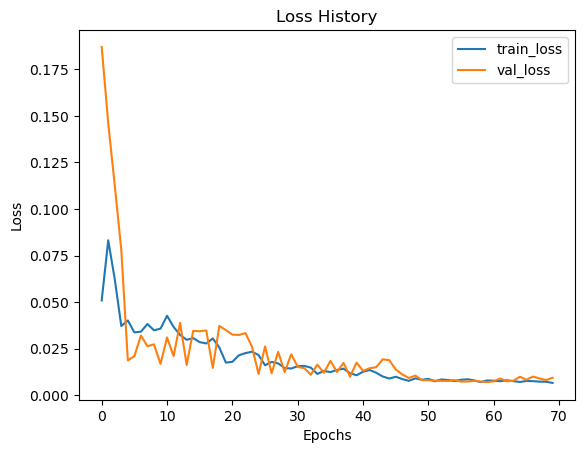

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

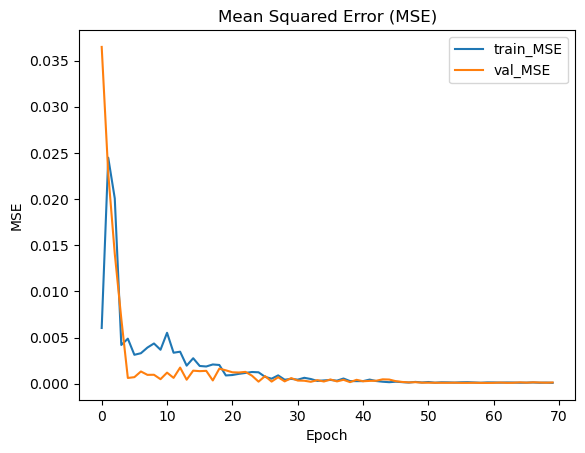

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

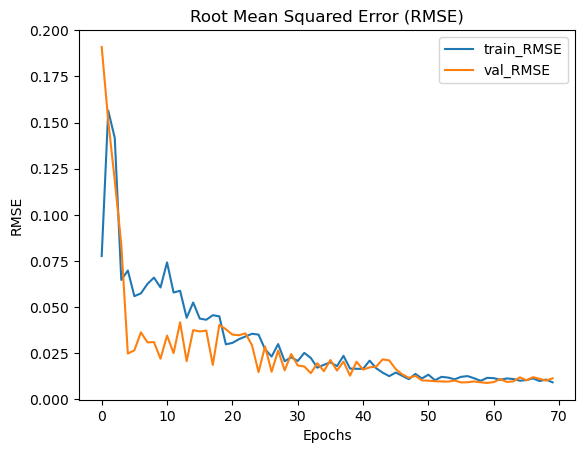

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

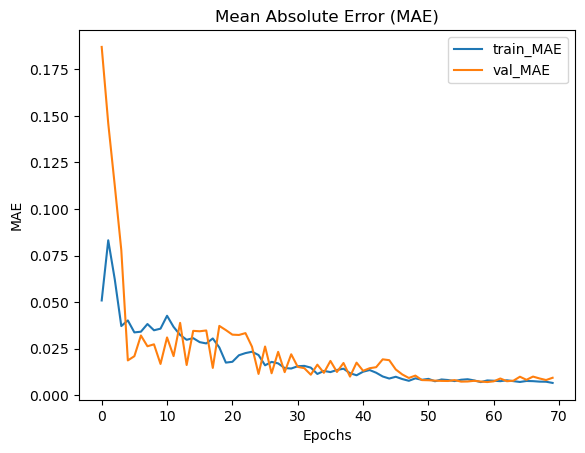

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

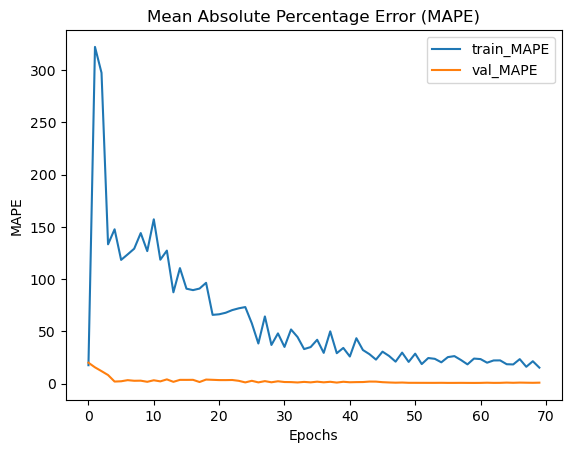

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:11:48.056861: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


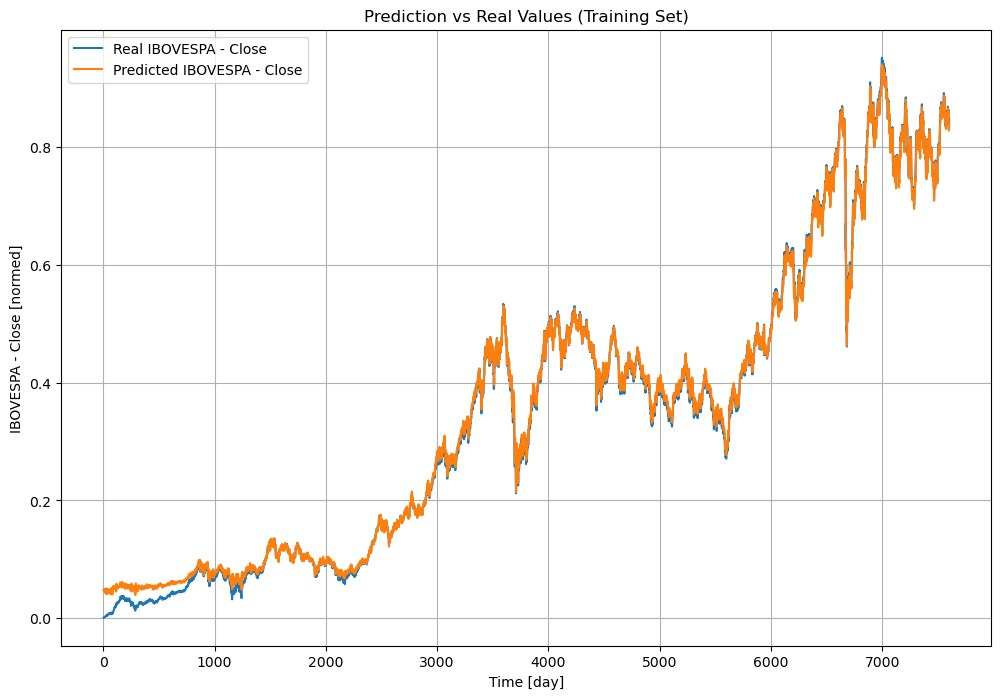

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


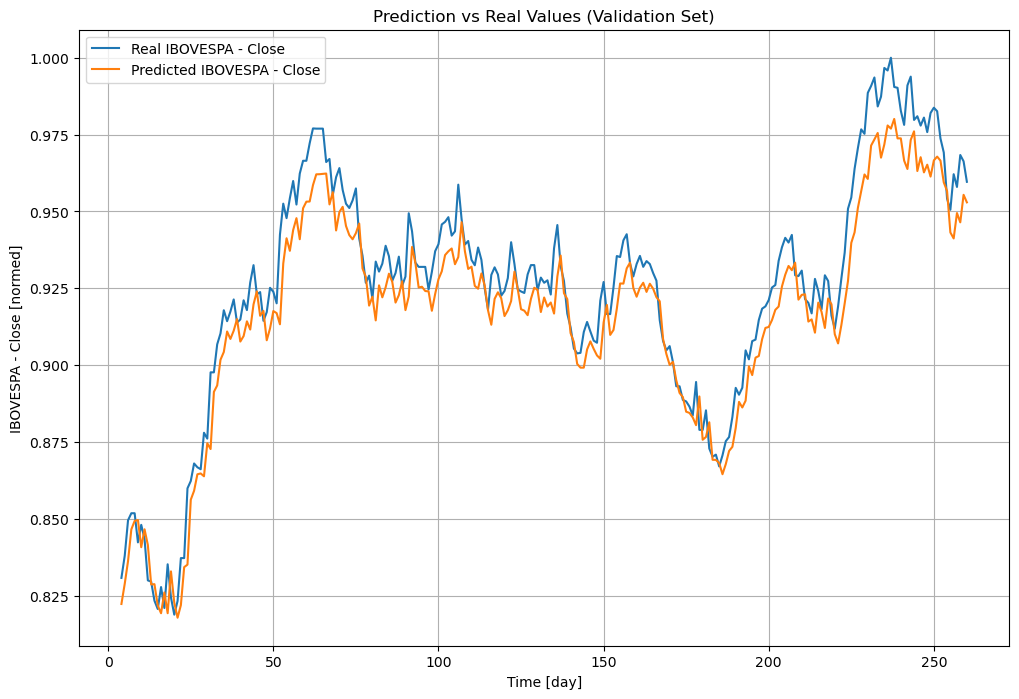

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


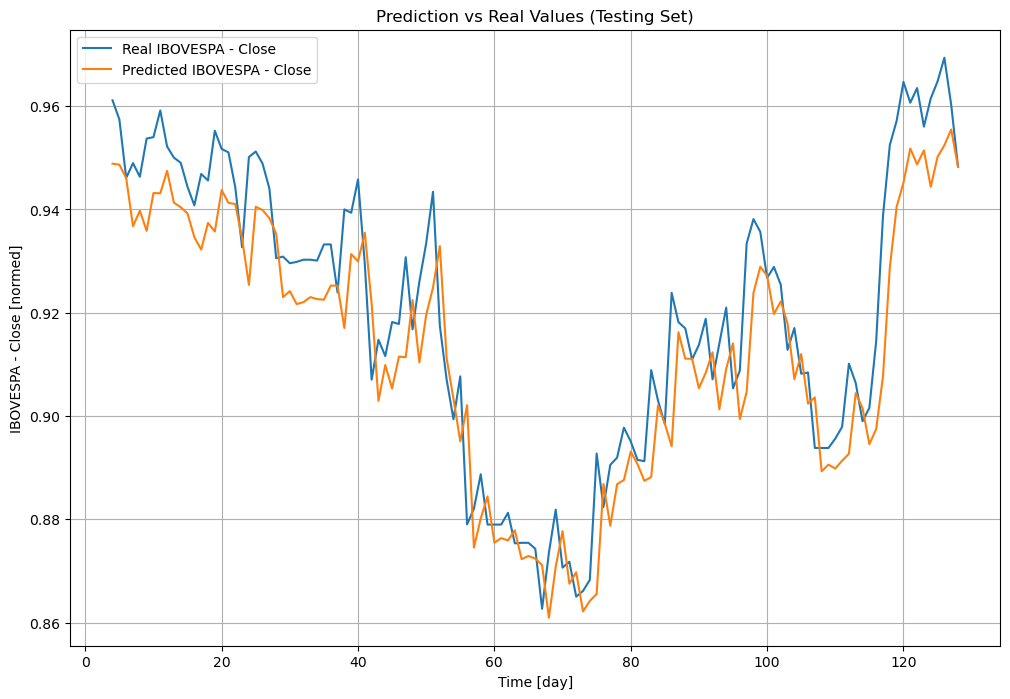

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

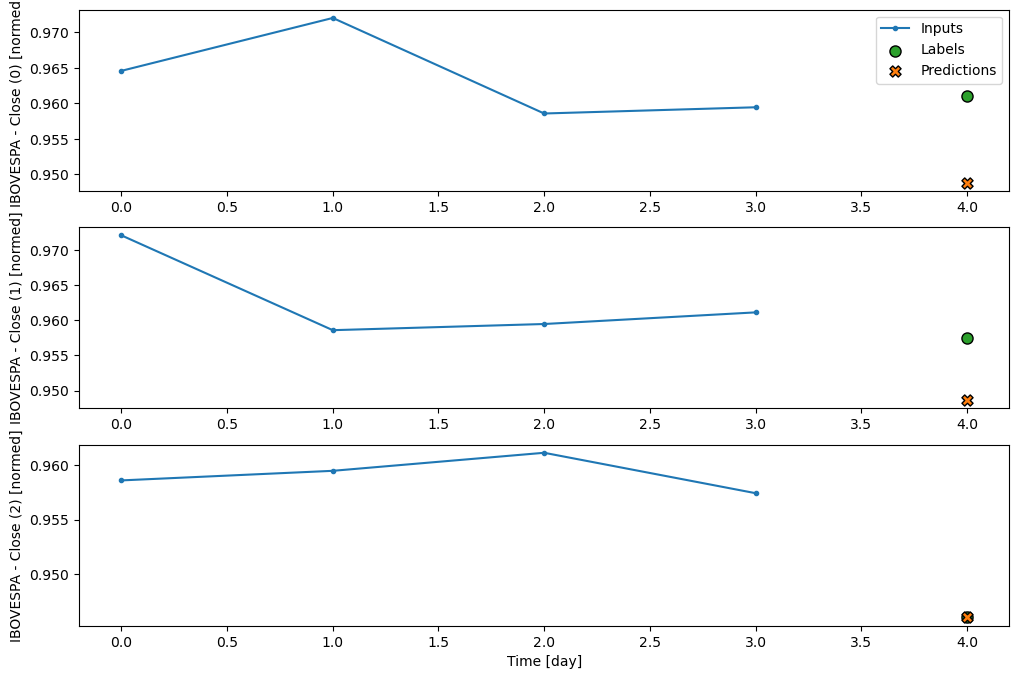

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:11s:504ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


array([[[0.9488462 , 0.9488462 , 0.9488462 , ..., 0.9488462 ,
         0.9488462 , 0.9488462 ]],

       [[0.94866836, 0.94866836, 0.94866836, ..., 0.94866836,
         0.94866836, 0.94866836]],

       [[0.94604874, 0.94604874, 0.94604874, ..., 0.94604874,
         0.94604874, 0.94604874]],

       ...,

       [[0.9524121 , 0.9524121 , 0.9524121 , ..., 0.9524121 ,
         0.9524121 , 0.9524121 ]],

       [[0.955469  , 0.955469  , 0.955469  , ..., 0.955469  ,
         0.955469  , 0.955469  ]],

       [[0.94826233, 0.94826233, 0.94826233, ..., 0.94826233,
         0.94826233, 0.94826233]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')